## Data Preparation

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Download NLTK data if not already
nltk.download('punkt_tab')
nltk.download('punkt', download_dir='/home/devuser/nltk_data')
nltk.download('stopwords')

# Setup
stop_words = set(stopwords.words('english'))
text = "This is a test sentence, with some stopwords like 'is', 'a', and punctuation!"
text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
words = word_tokenize(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/devuser/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/devuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/devuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
import json
import os

path = r"./data/ALL/"
sub_dir = ["train", "val", "test"]
datasets = {}
retrieved_stat = {}
docs = {}
irrelevant_phrases = {"hi", "hello", "thanks", "okay", "cool", 
                      "bye", "see you", "good morning", "morning"}
for d in sub_dir:
    datasets[d] = []
    docs[d] = []
    for file in os.listdir(path+d):
        if file[-4:] != "json":
          continue
        with open(f"{path}{d}/{file}", "r") as f:
          data = json.load(f)
          transcript_data = data["meeting_transcripts"]
          # Keep only train stat
          if d == "train":
            retrieved_stat[file] = [0 for _ in range(len(transcript_data))]

          # parse meeting_transcripts to raw docs
          doc = ""
          for meeting in transcript_data:
                # doc += f"[{meeting['speaker']}]: {meeting['content']}" + "\n"
            doc += meeting["content"] + "\n"
          docs[d].append(doc)
          
          for query in data["specific_query_list"]:
            # parse relevant_text_span
            st, ed = (int(i) for i in query["relevant_text_span"][0])
            retrieved_text = []
            for i in range(st, ed+1):
              # content = f"[{transcript_data[i]['speaker']}]: {transcript_data[i]['content']}"
              content = transcript_data[i]['content']
              retrieved_text.append(content)
              if d == "train":
                retrieved_stat[file][i] += 1
              
            datasets[d].append(
                {
                  "query": query["query"],
                  "retrieved": retrieved_text
                }
            )

In [117]:
len(docs["train"]), len(docs["val"]), len(docs["test"])

(162, 35, 35)

In [118]:
len(datasets["train"]), len(datasets["train"]), len(datasets["train"])

(1095, 1095, 1095)

In [119]:
retrieved_stat.keys()

dict_keys(['TS3007a.json', 'Bmr011.json', 'ES2014c.json', 'Bmr015.json', 'Bro014.json', 'education_8.json', 'Buw001.json', 'Bed004.json', 'IS1000d.json', 'covid_1.json', 'education_24.json', 'ES2002c.json', 'ES2015b.json', 'ES2003b.json', 'TS3007b.json', 'education_3.json', 'Bmr003.json', 'ES2014a.json', 'education_1.json', 'Bro010.json', 'TS3006d.json', 'Bmr027.json', 'ES2016c.json', 'TS3003b.json', 'IS1005a.json', 'IS1007d.json', 'IS1008d.json', 'ES2007d.json', 'covid_10.json', 'ES2015d.json', 'TS3012a.json', 'Bmr013.json', 'Bmr025.json', 'IS1001b.json', 'ES2002b.json', 'ES2005b.json', 'Bdb001.json', 'IS1007b.json', 'TS3008a.json', 'IS1002c.json', 'ES2010d.json', 'TS3006a.json', 'covid_8.json', 'ES2015c.json', 'IS1004d.json', 'IS1004b.json', 'TS3005a.json', 'ES2007c.json', 'Bed011.json', 'TS3006c.json', 'TS3006b.json', 'education_2.json', 'IS1000a.json', 'TS3003a.json', 'ES2013d.json', 'education_16.json', 'Bed017.json', 'ES2014d.json', 'ES2010a.json', 'ES2003a.json', 'Bmr024.json', 

In [120]:
len(retrieved_stat['TS3007a.json'])

445

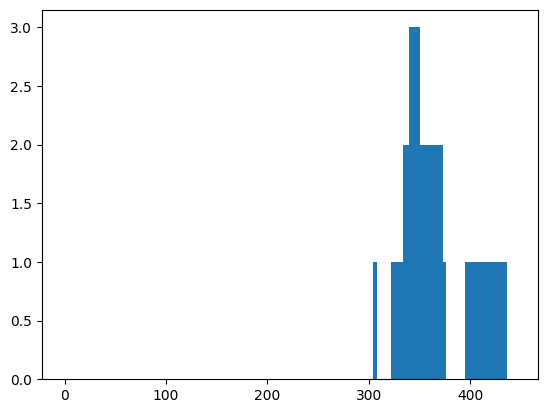

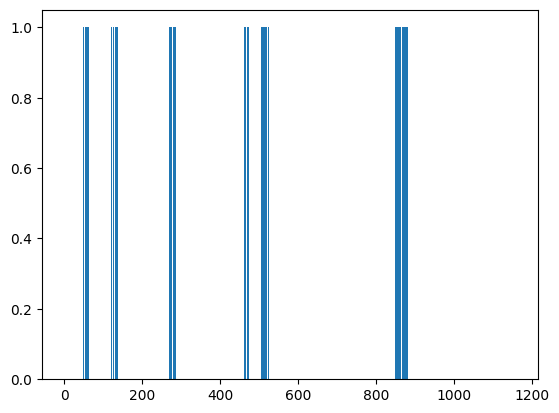

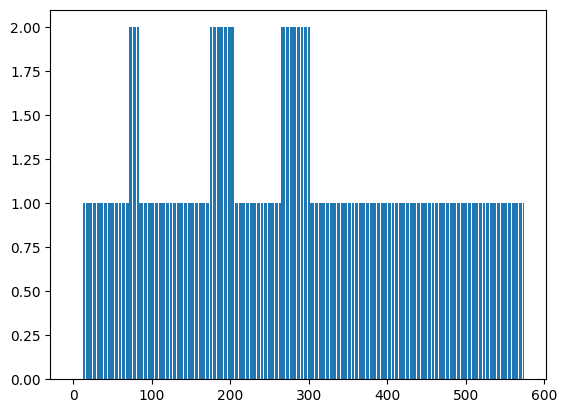

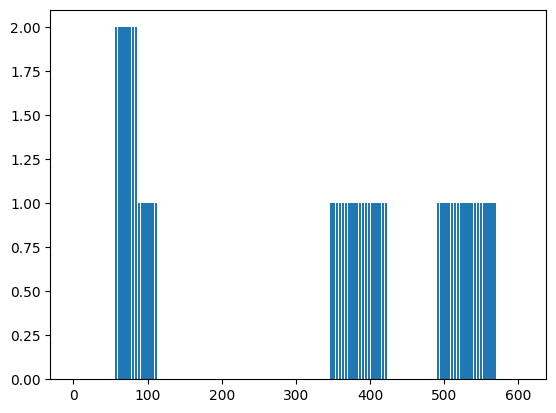

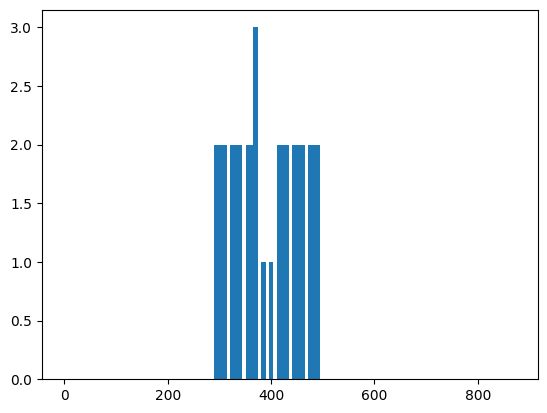

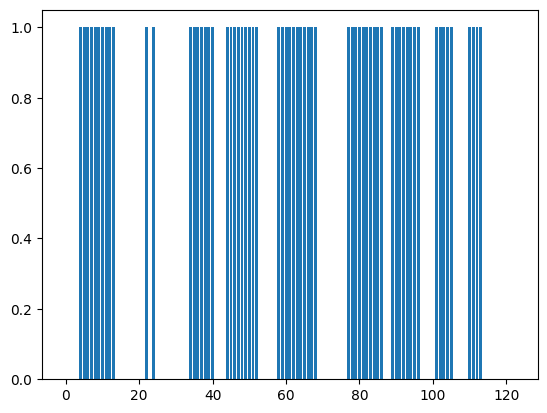

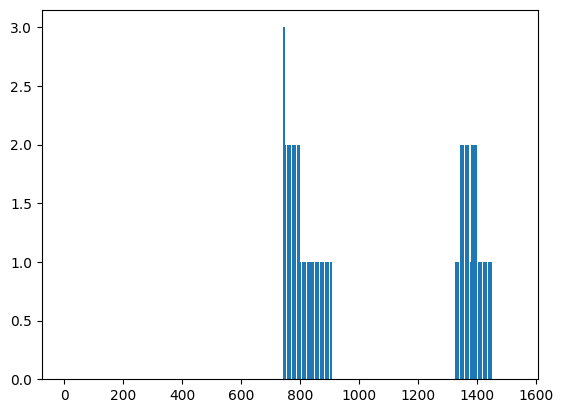

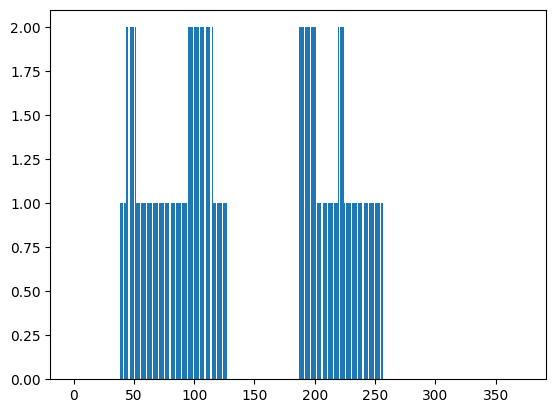

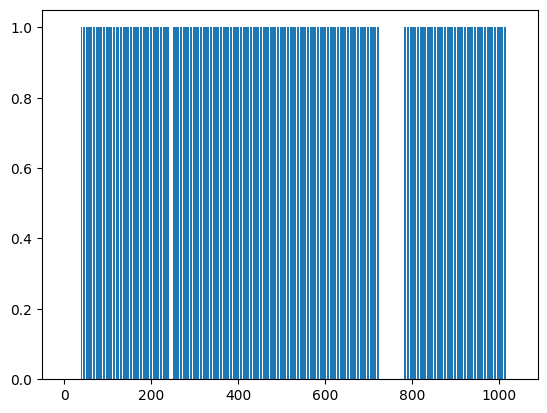

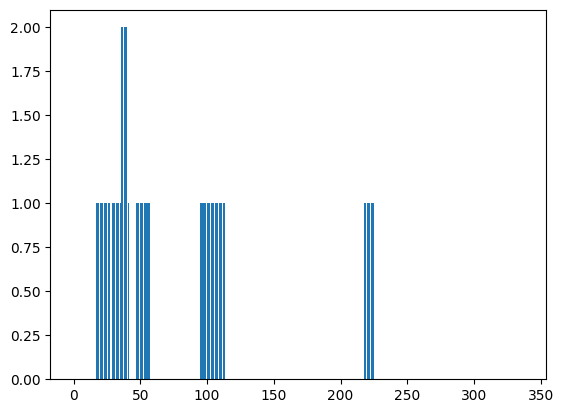

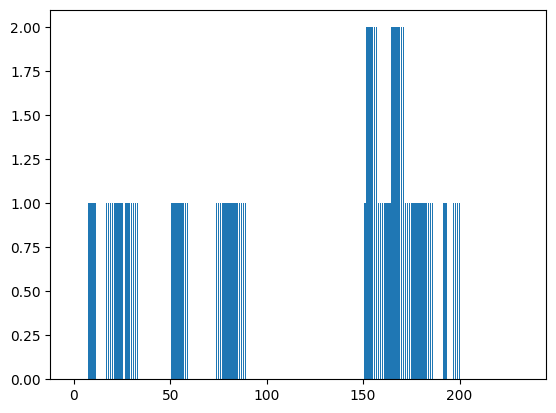

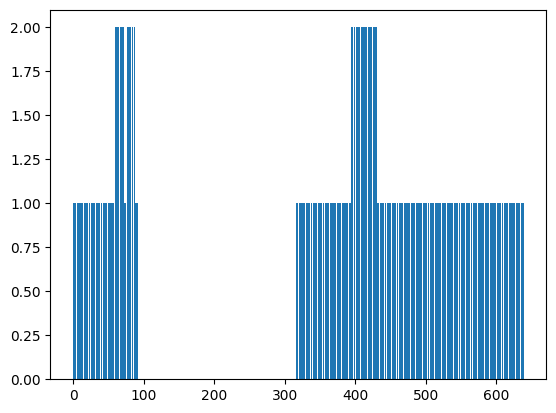

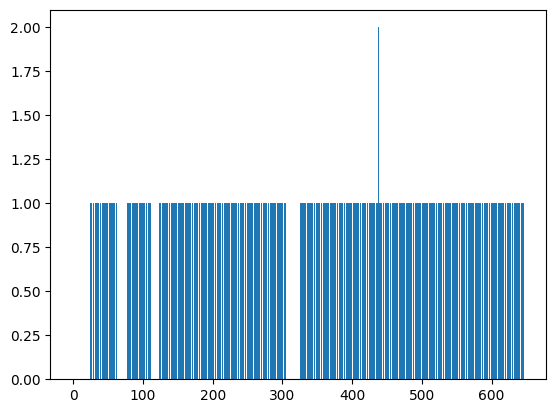

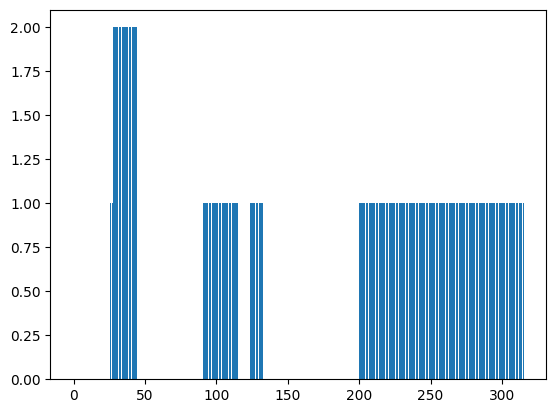

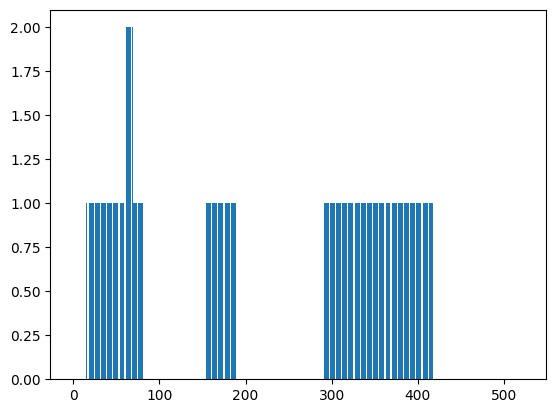

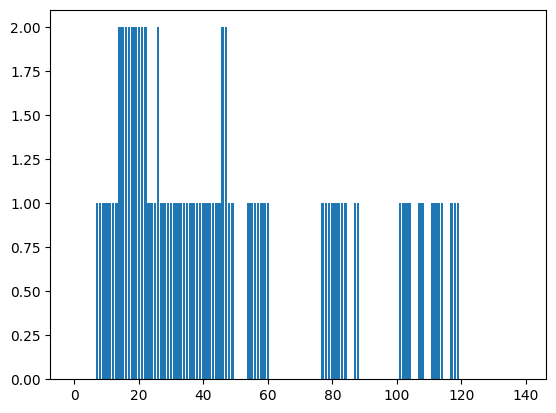

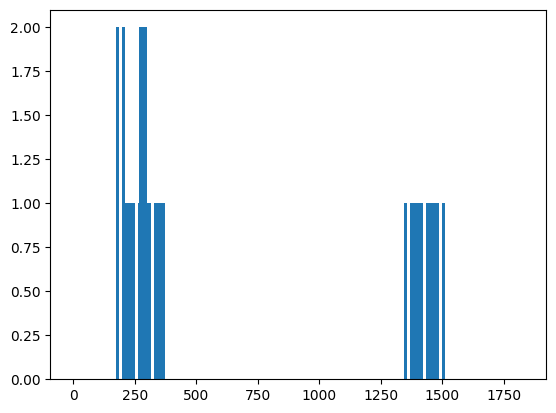

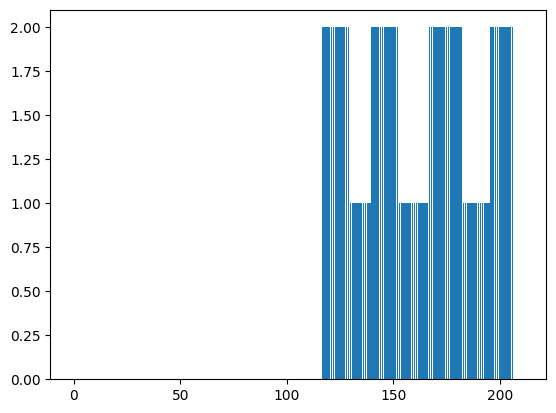

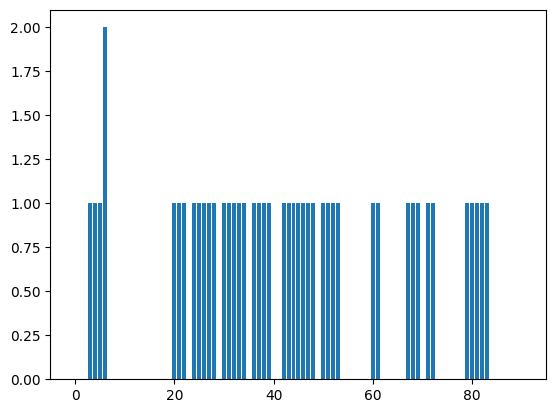

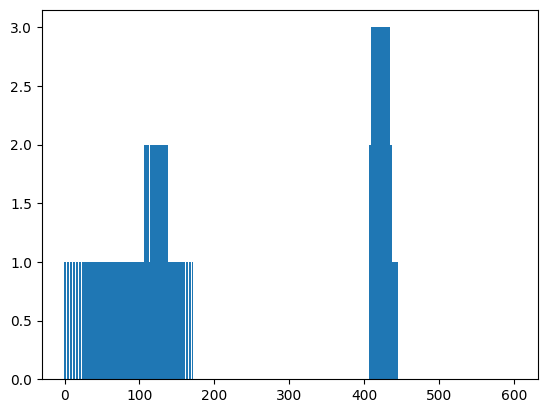

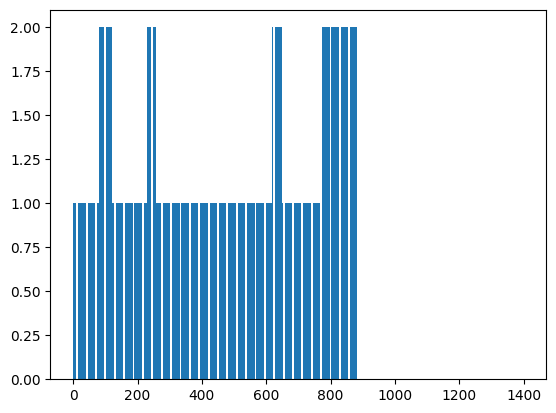

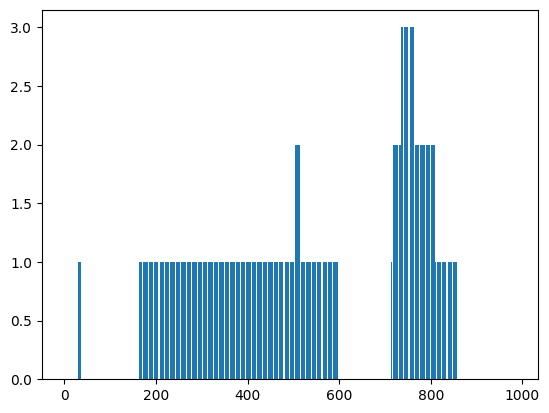

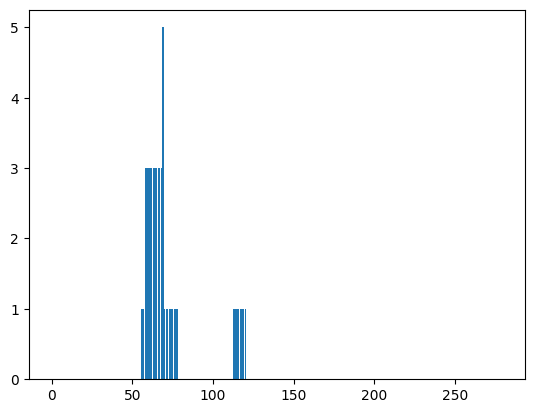

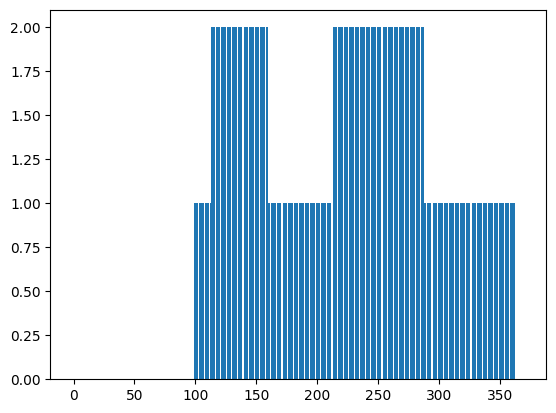

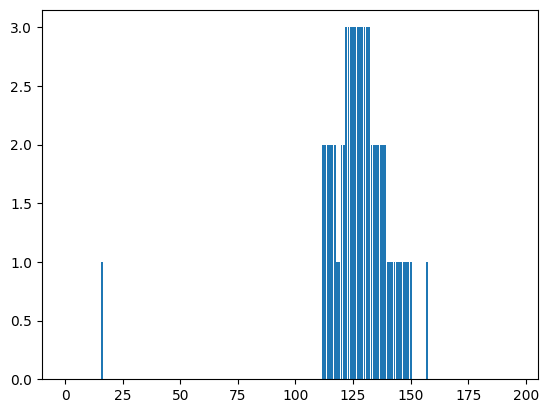

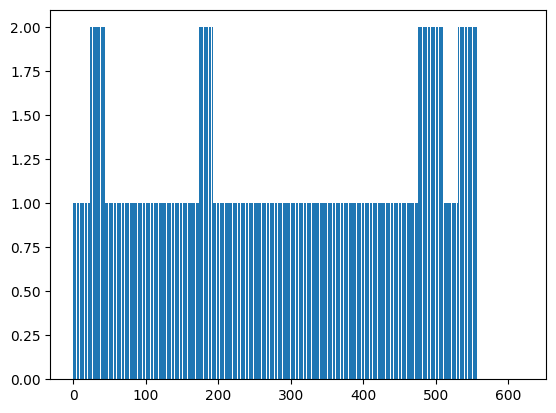

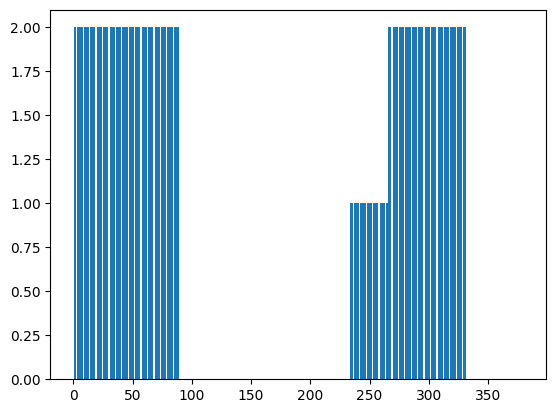

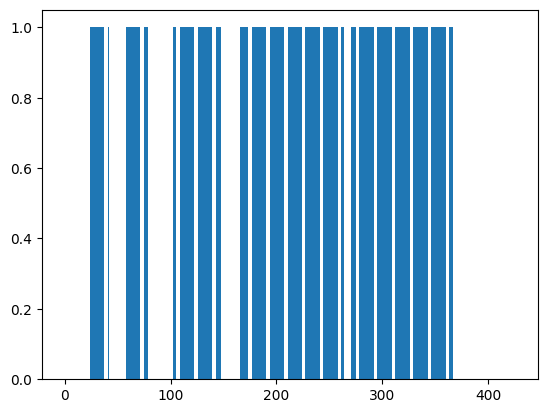

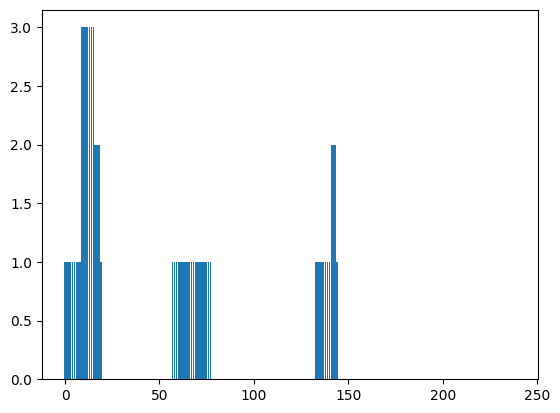

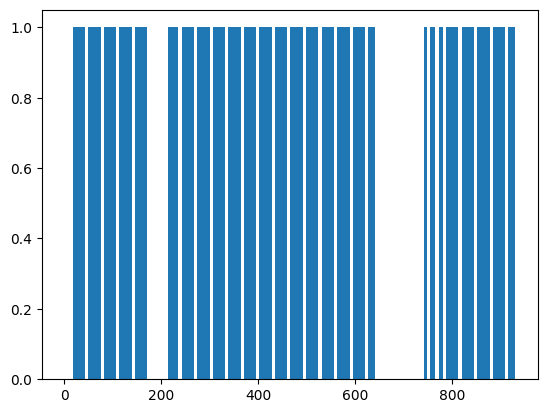

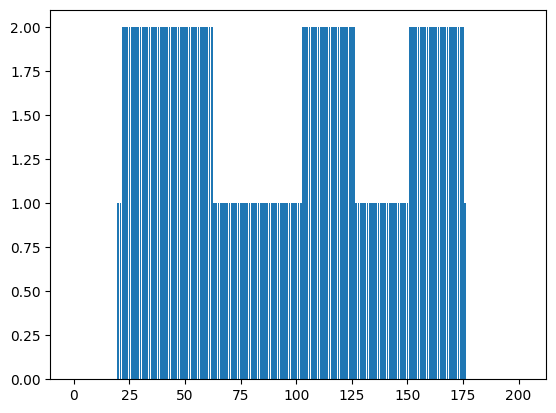

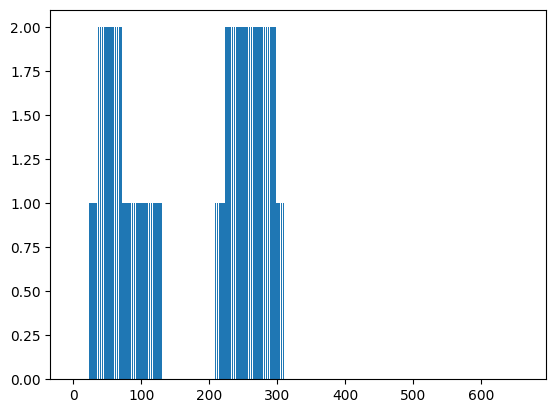

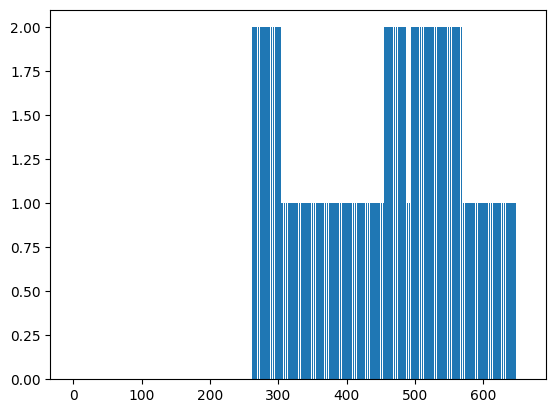

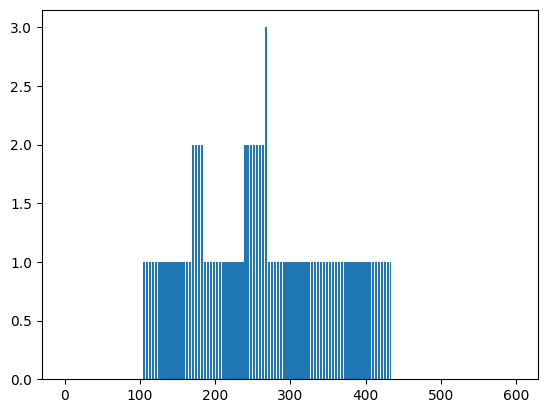

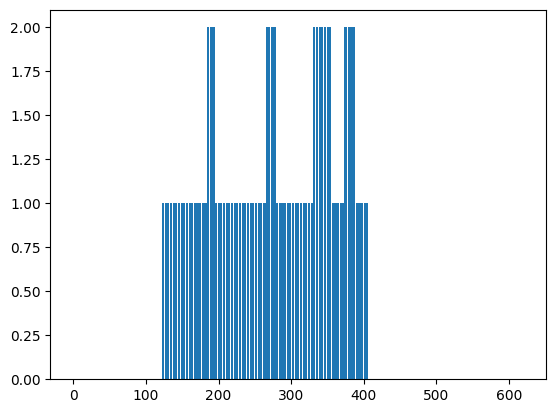

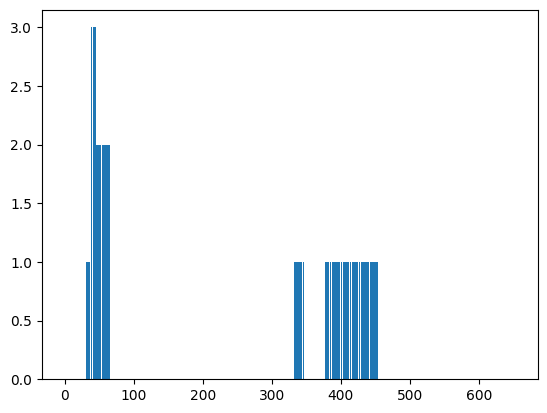

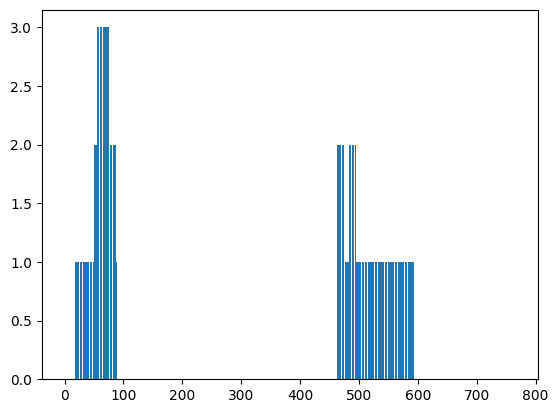

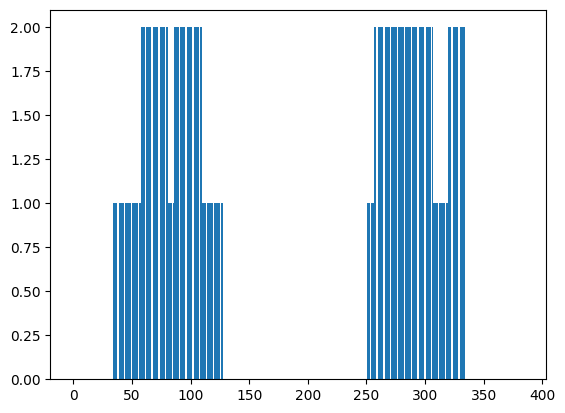

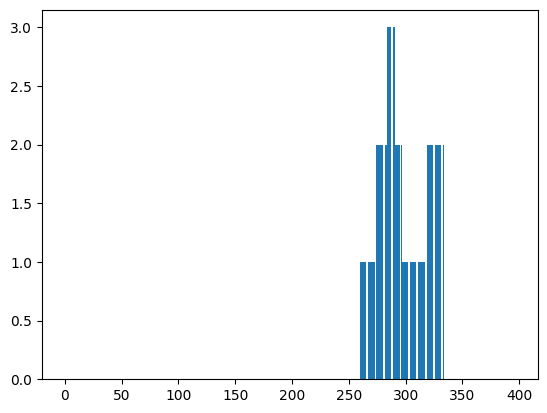

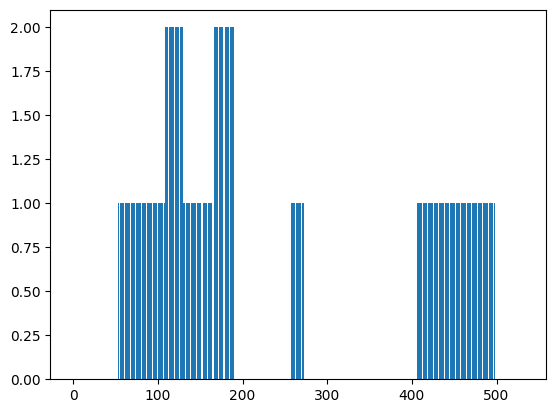

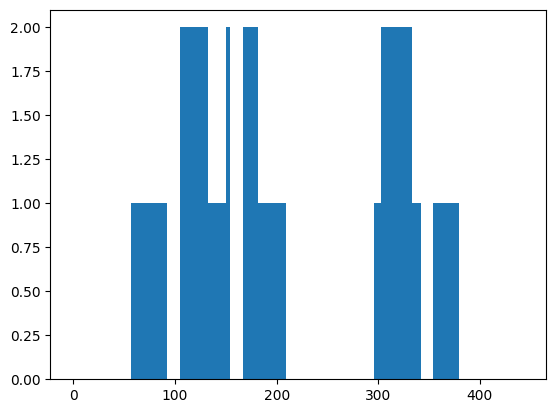

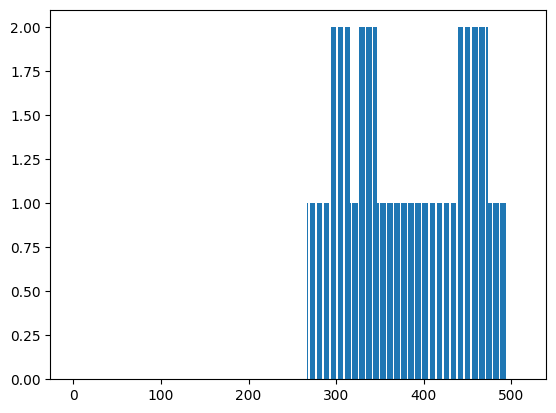

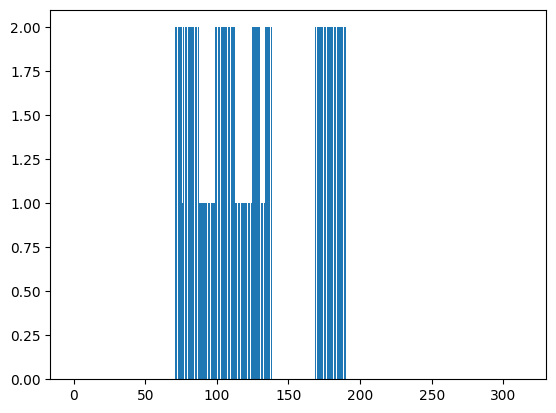

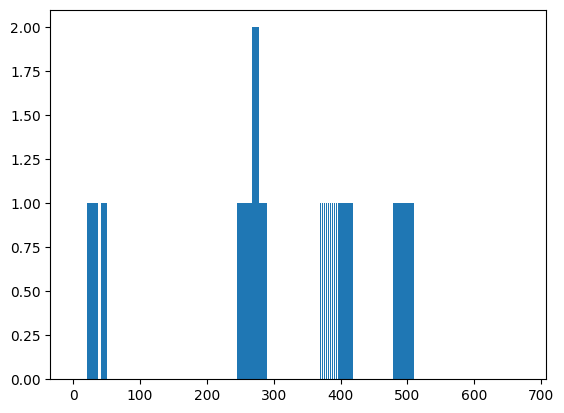

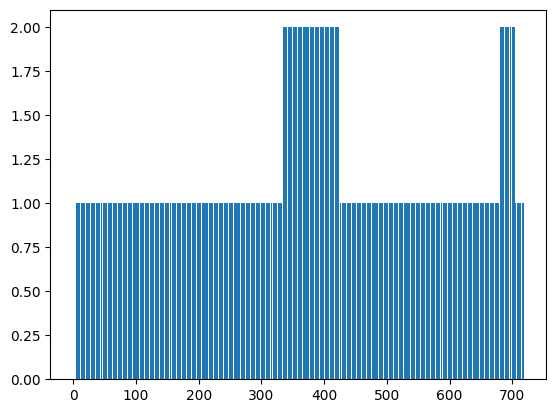

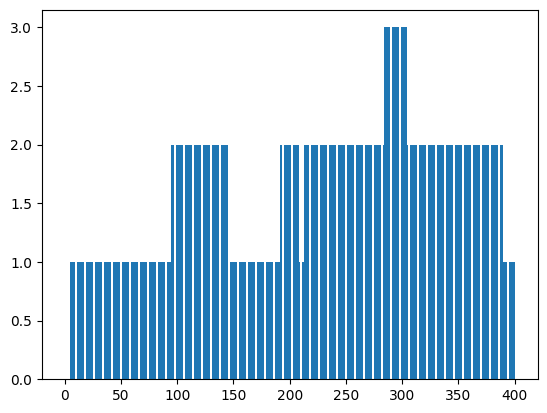

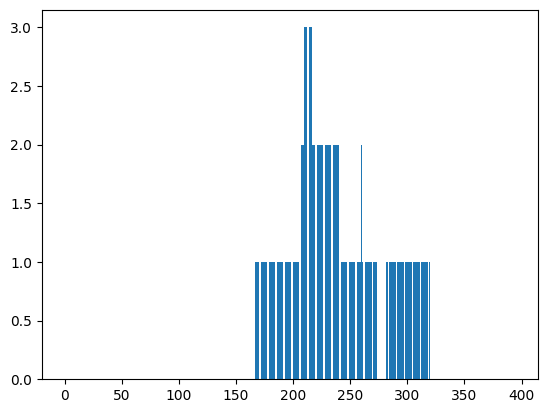

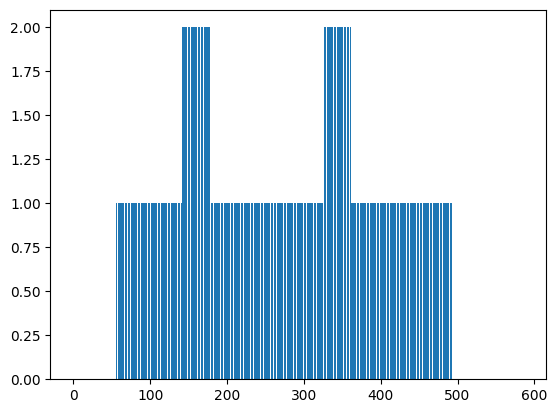

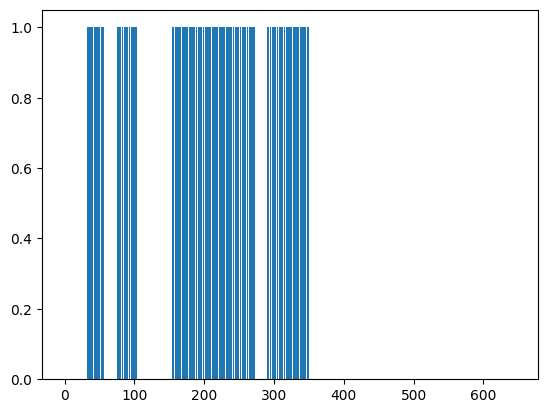

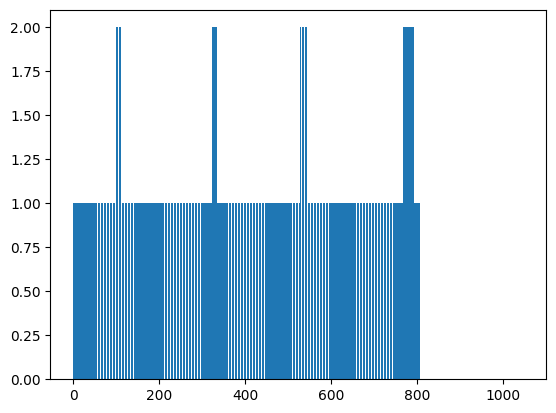

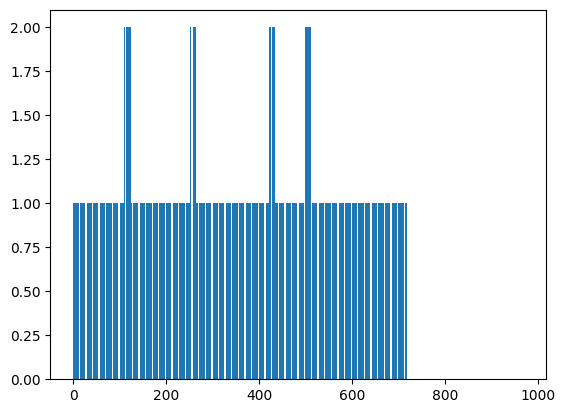

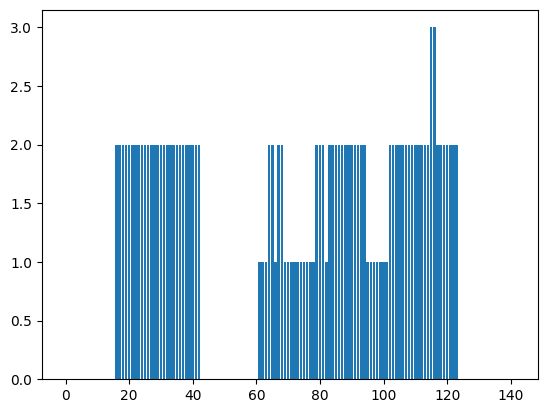

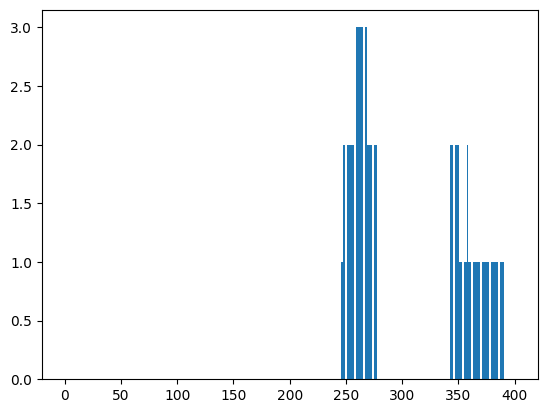

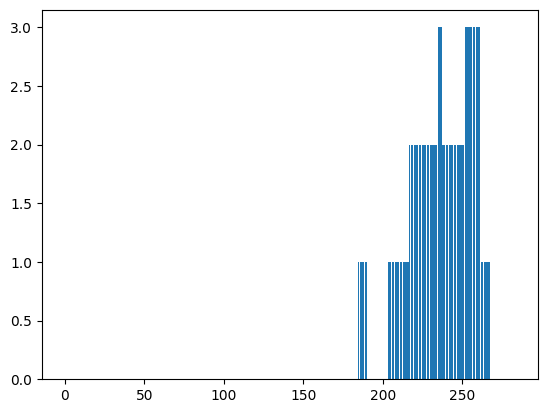

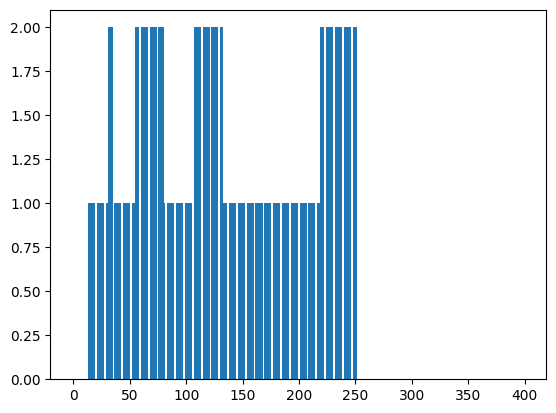

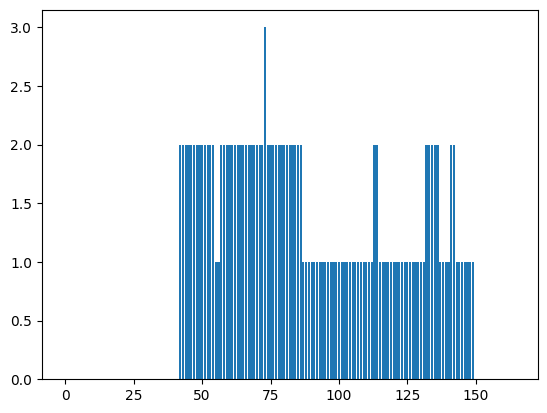

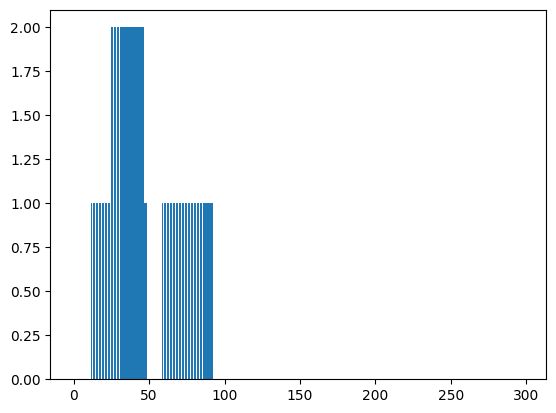

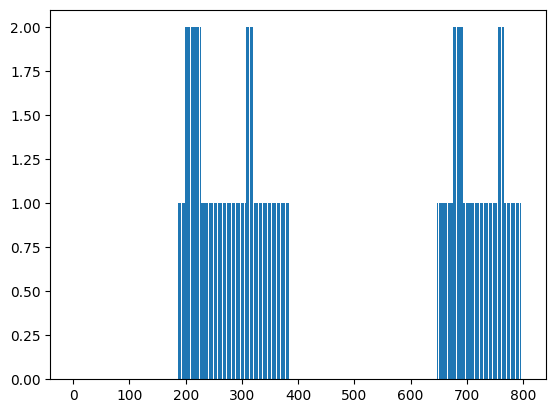

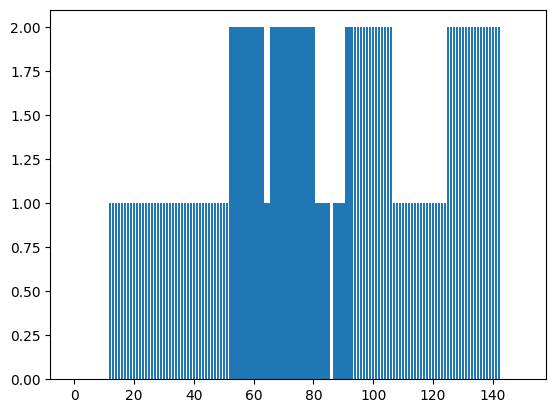

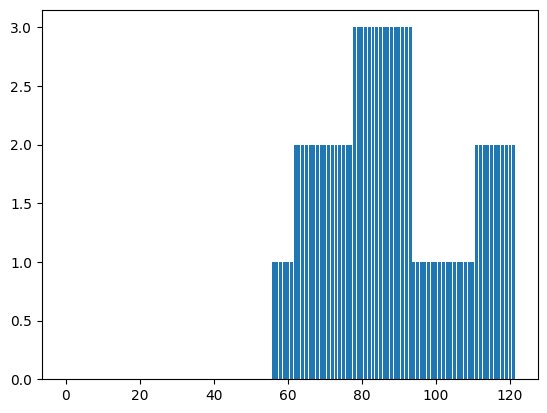

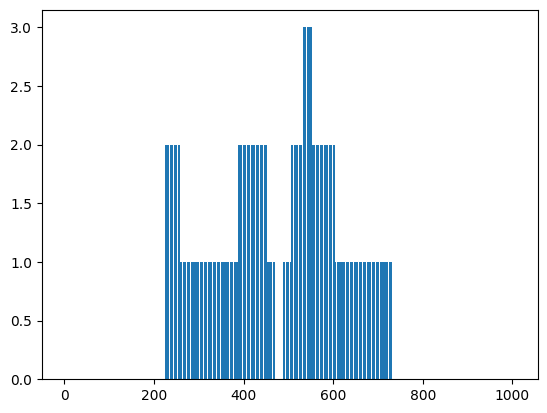

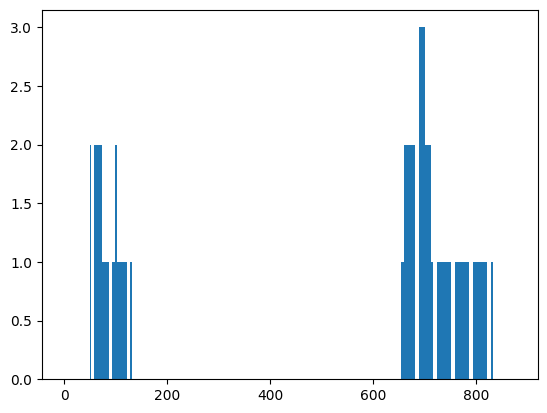

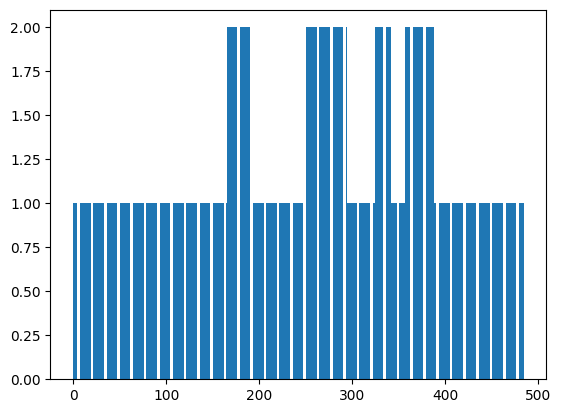

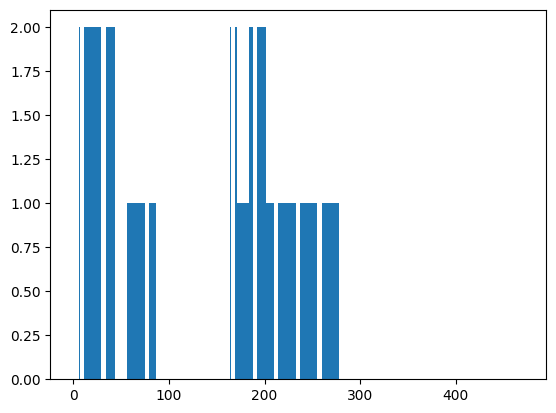

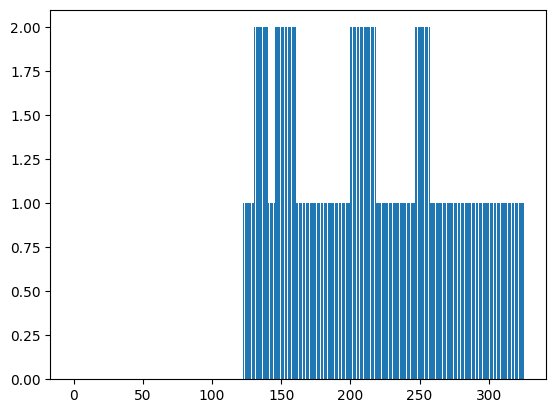

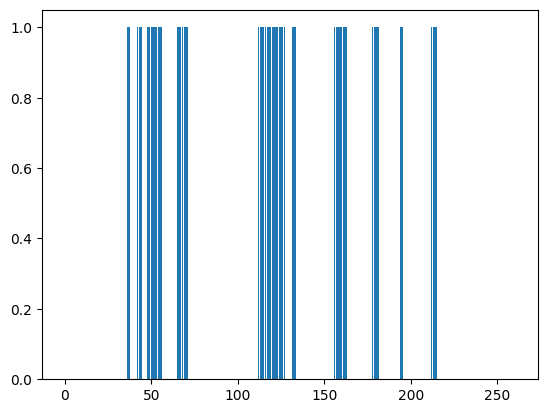

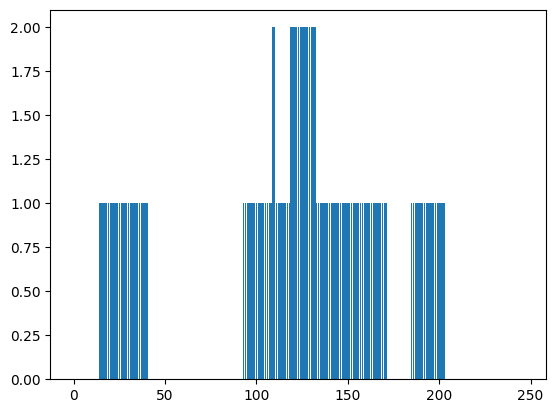

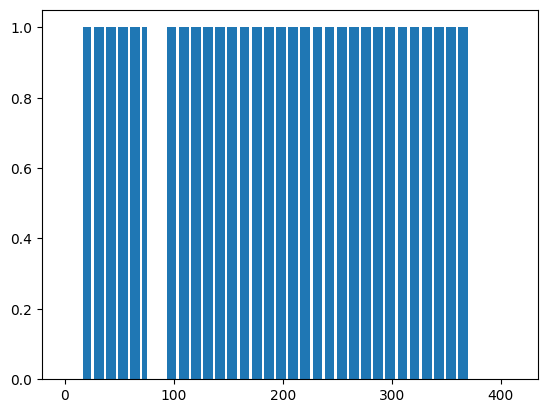

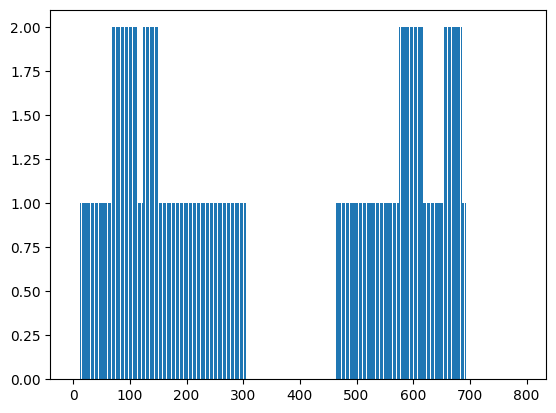

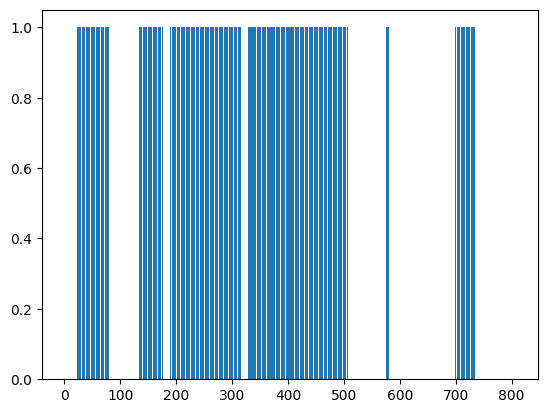

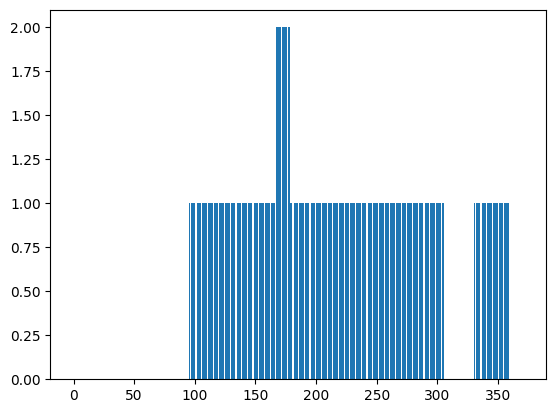

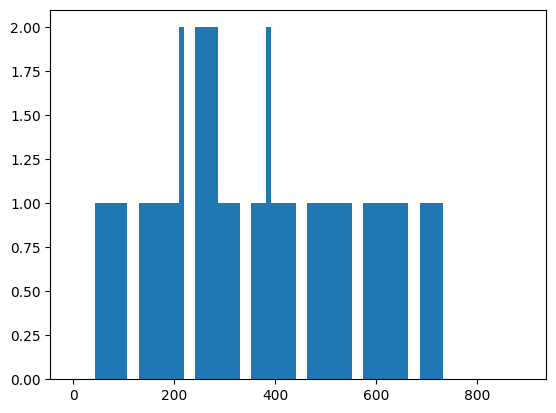

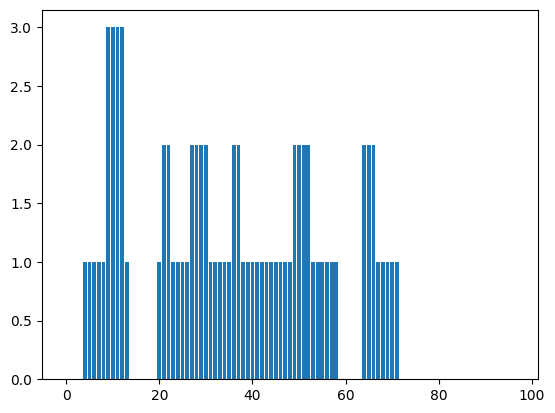

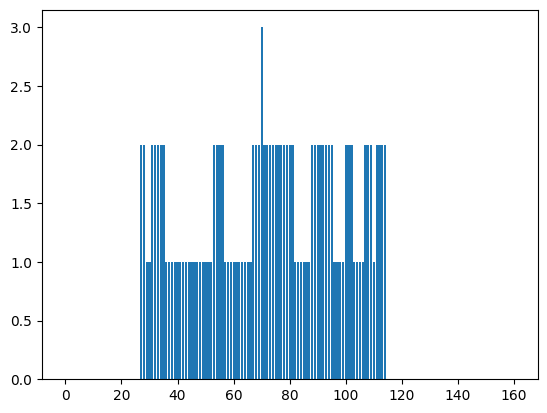

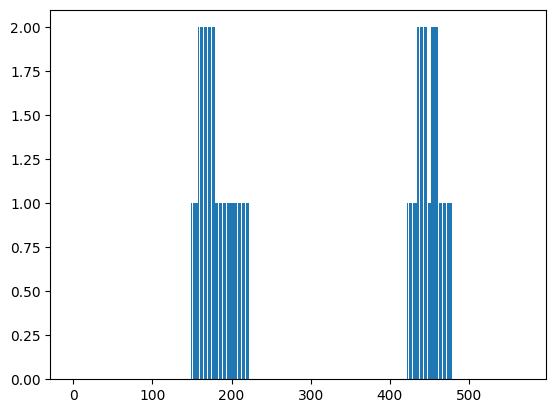

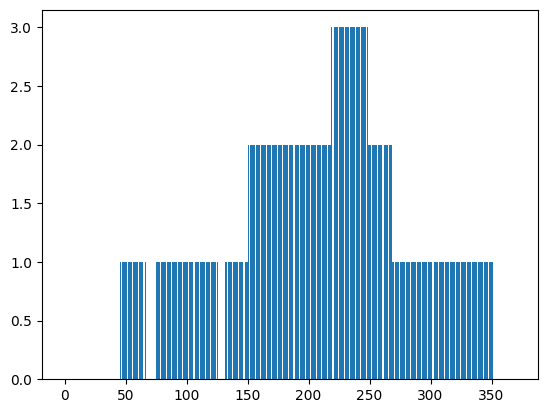

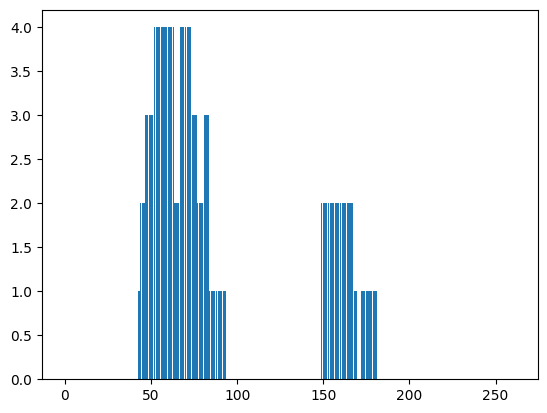

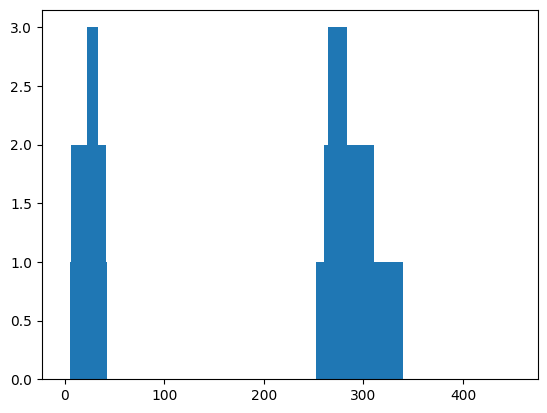

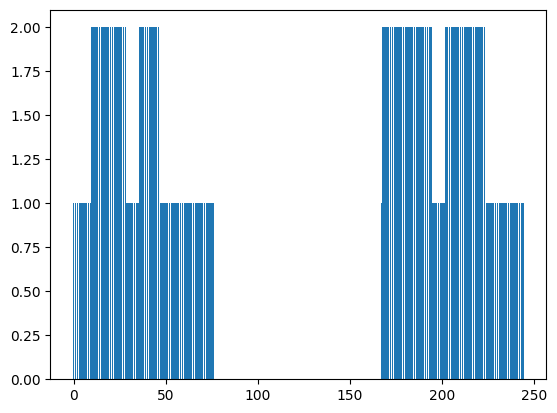

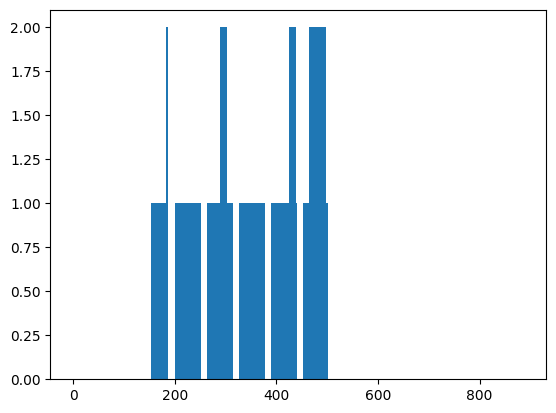

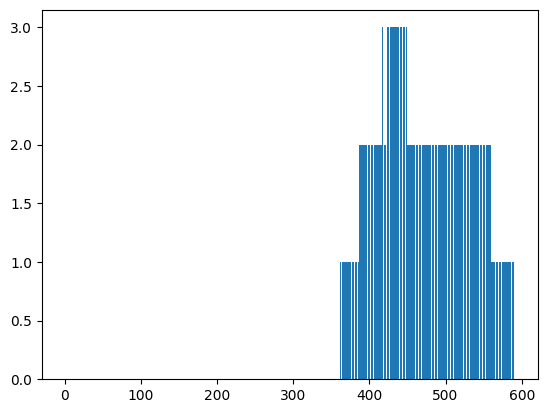

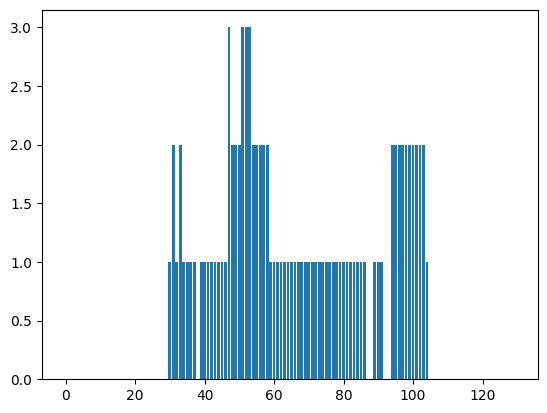

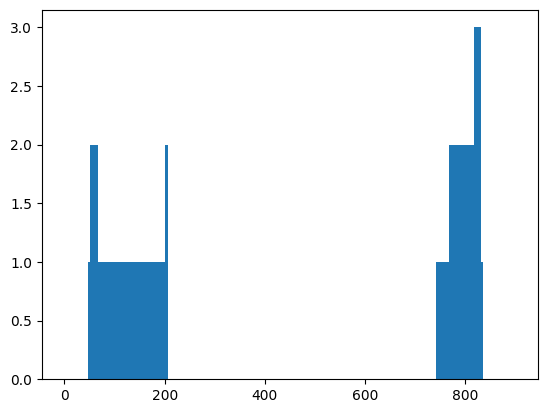

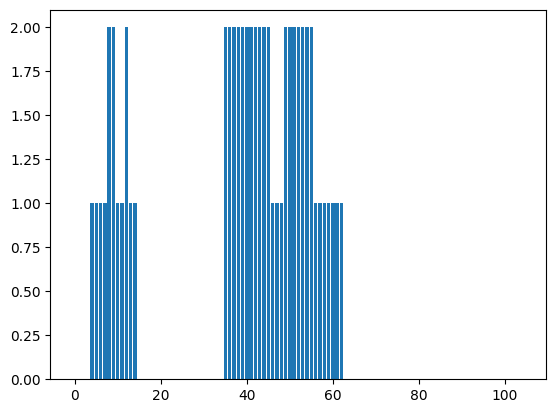

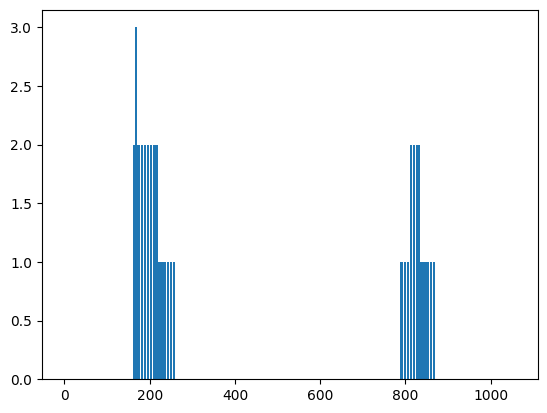

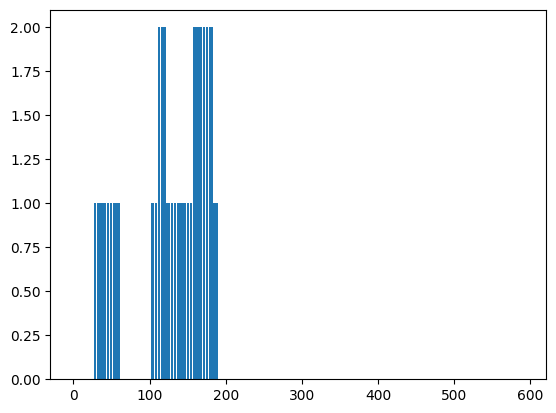

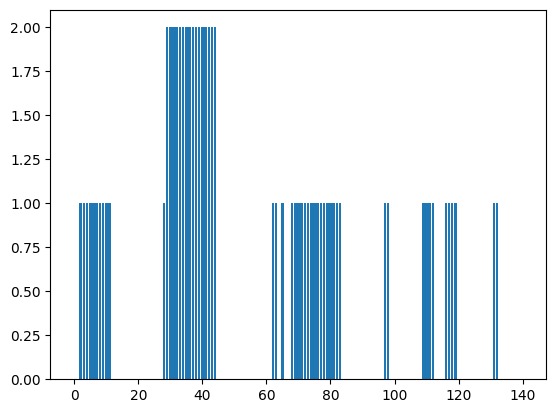

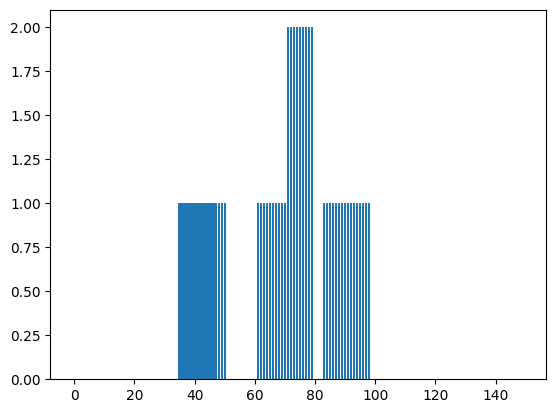

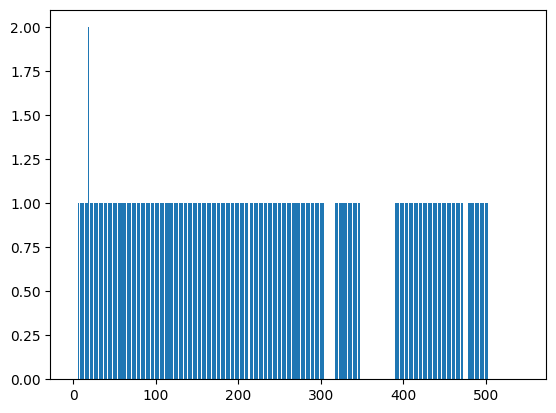

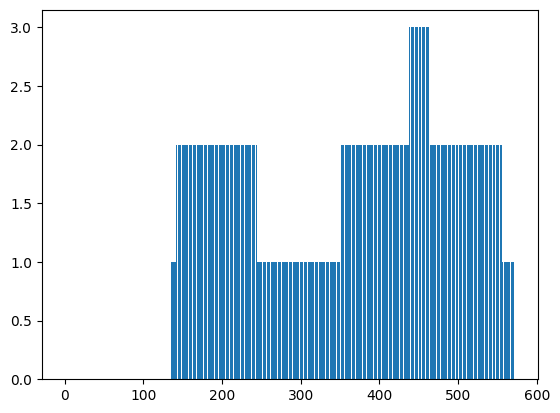

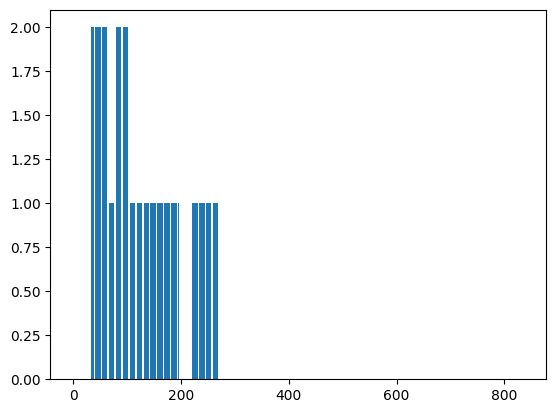

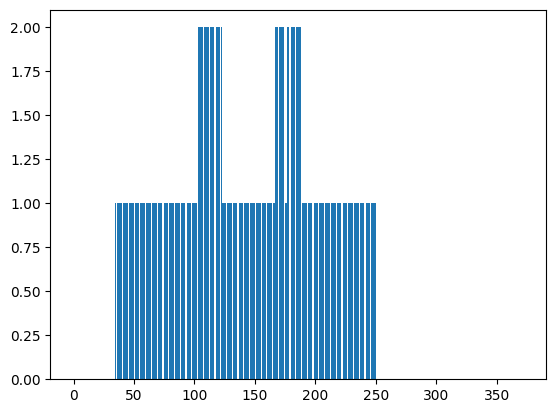

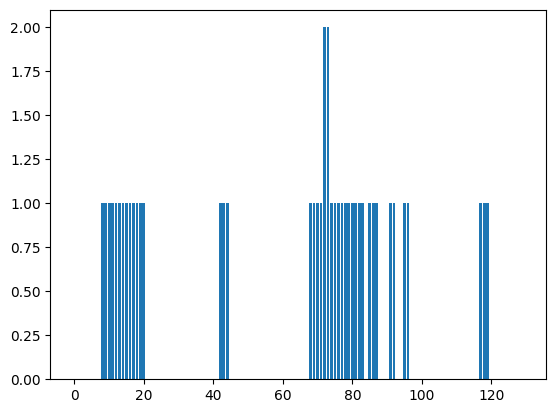

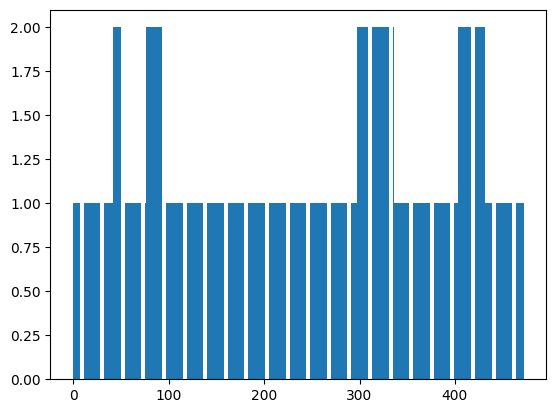

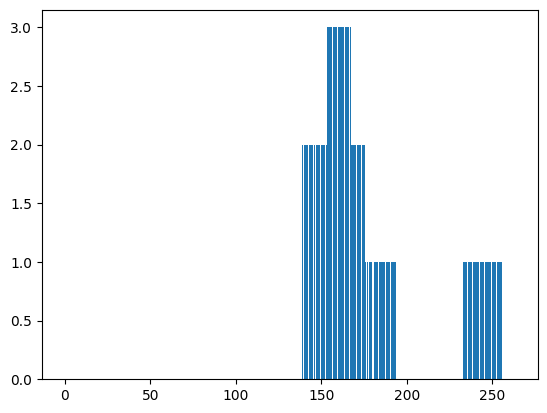

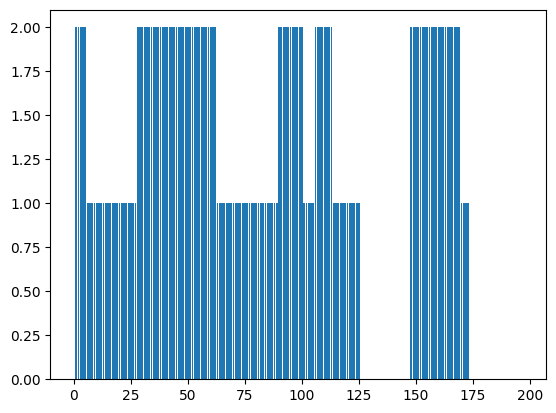

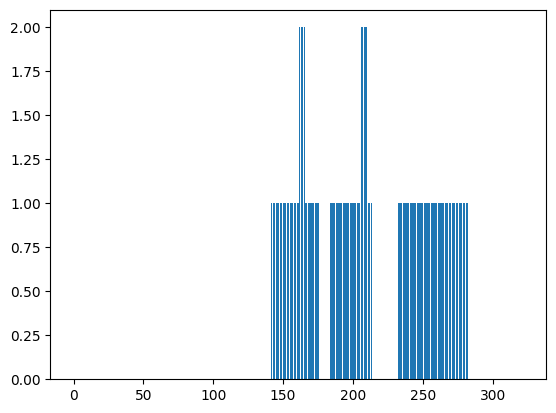

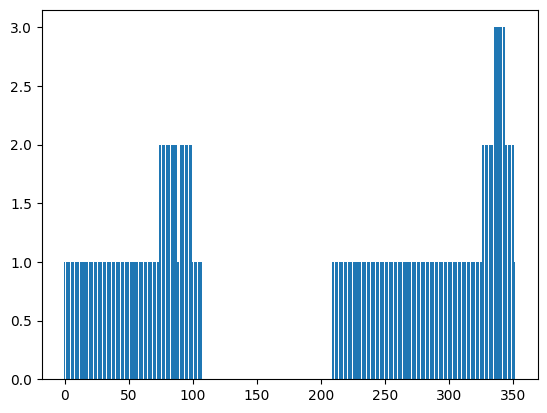

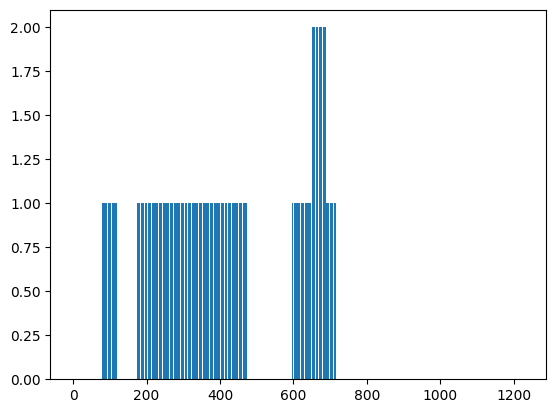

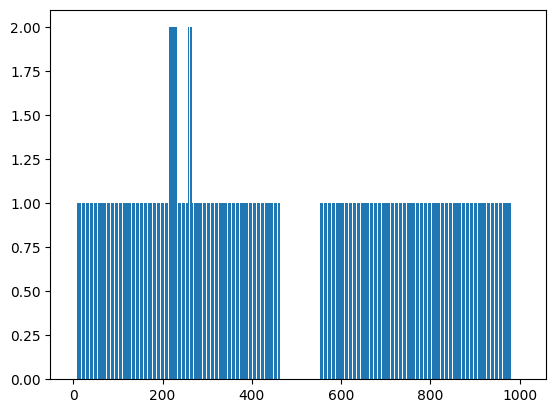

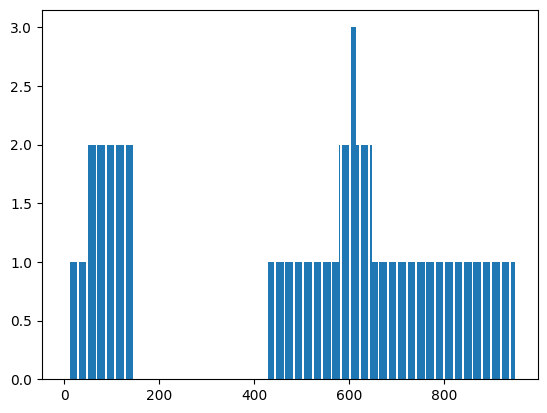

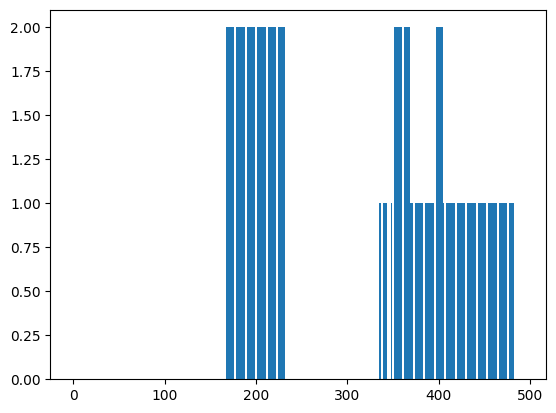

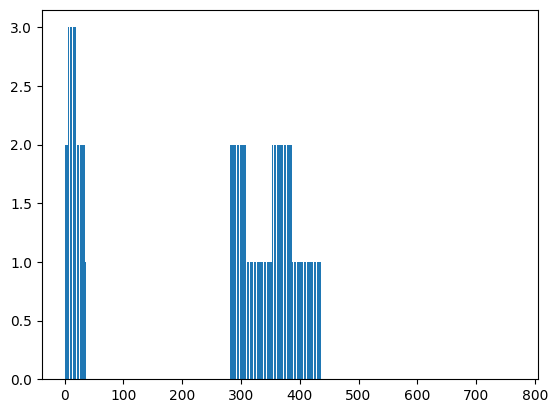

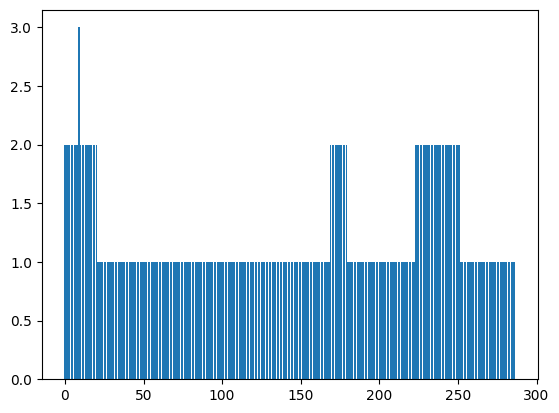

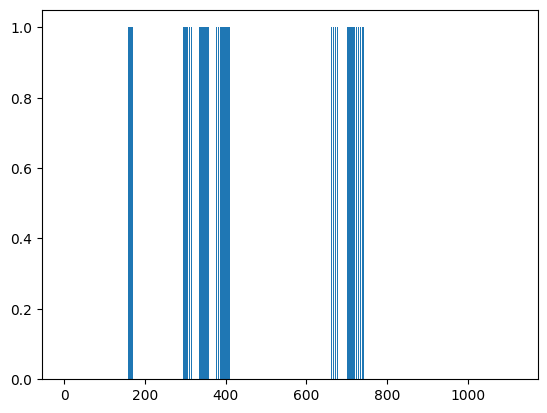

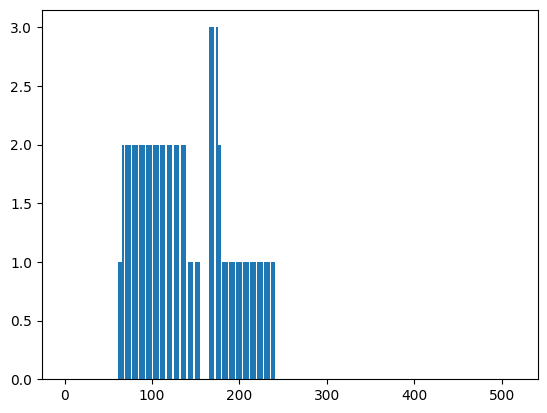

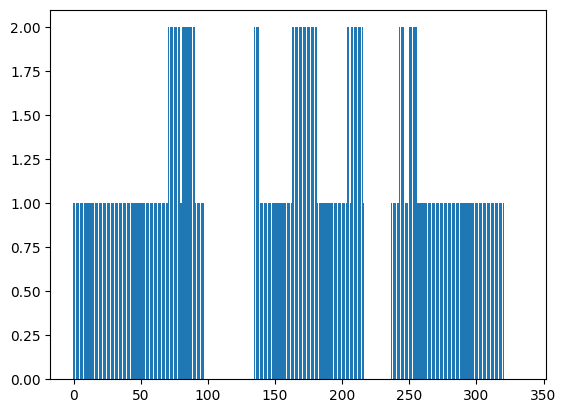

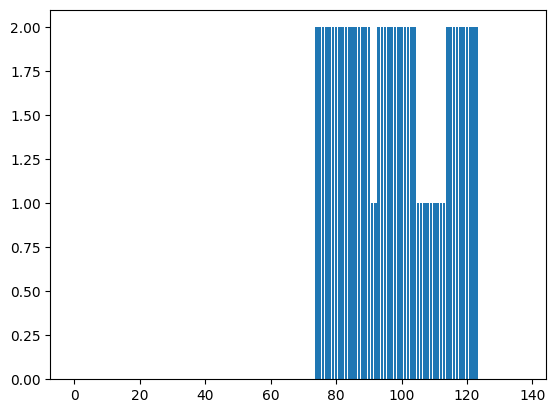

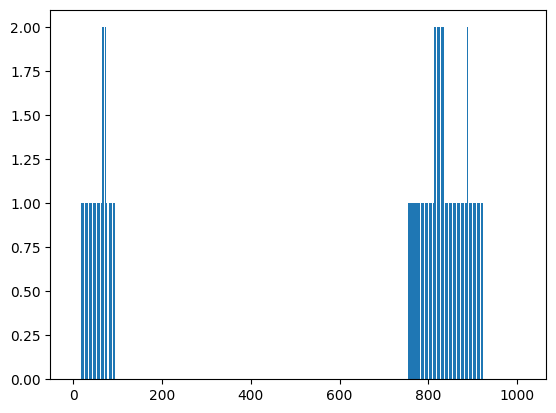

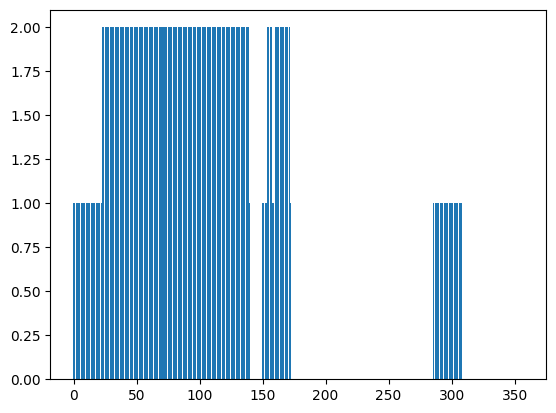

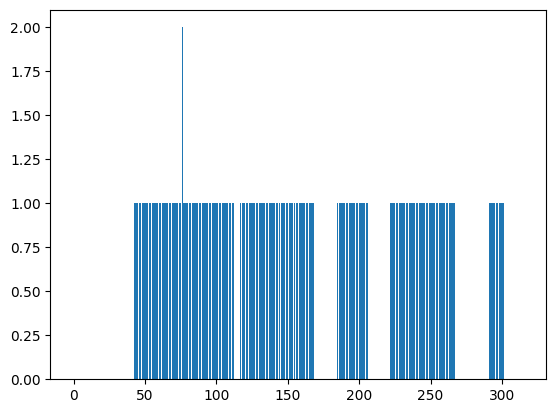

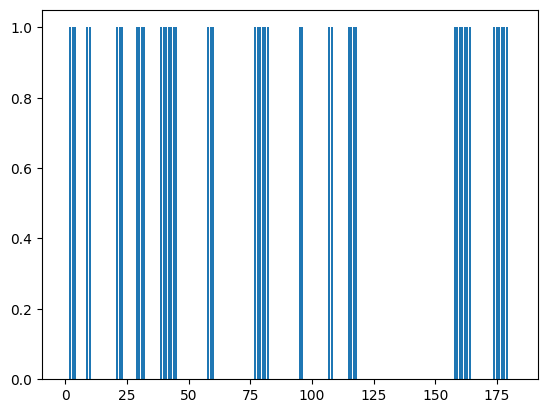

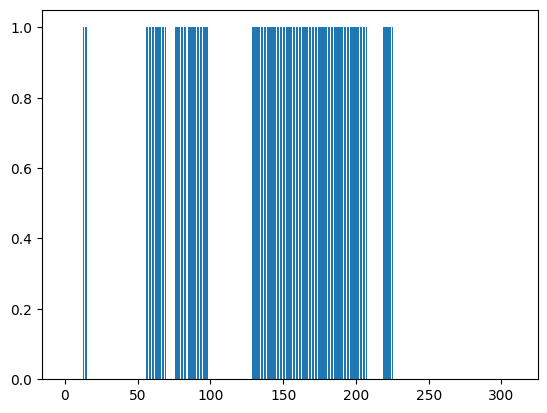

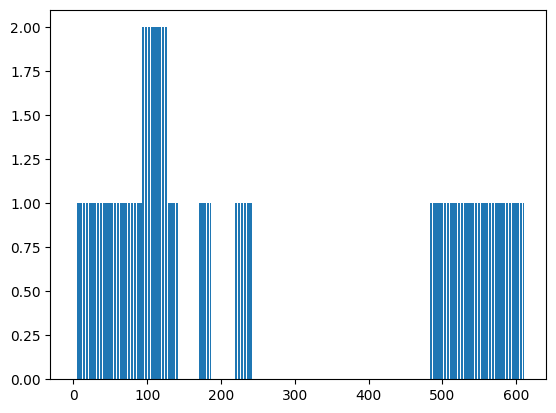

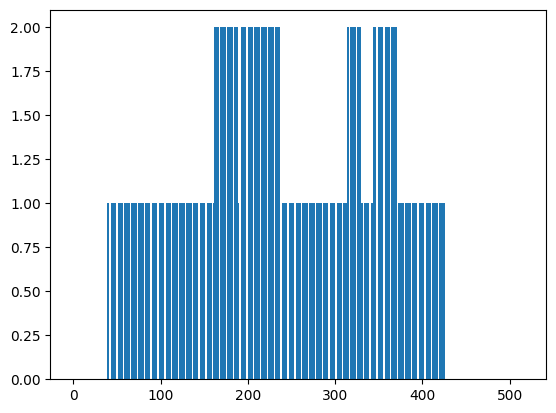

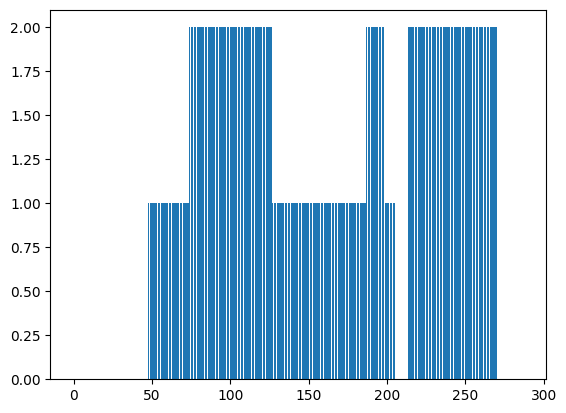

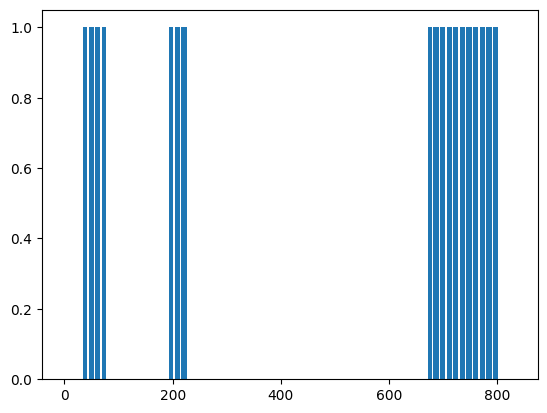

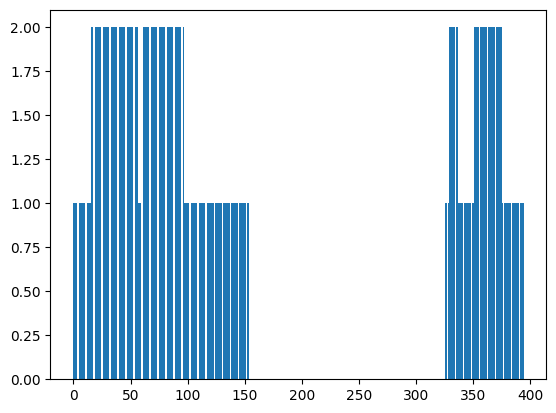

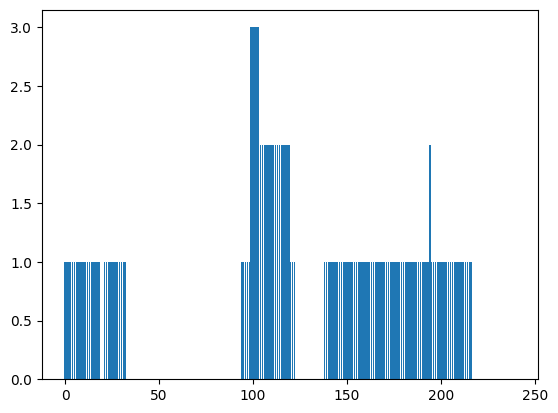

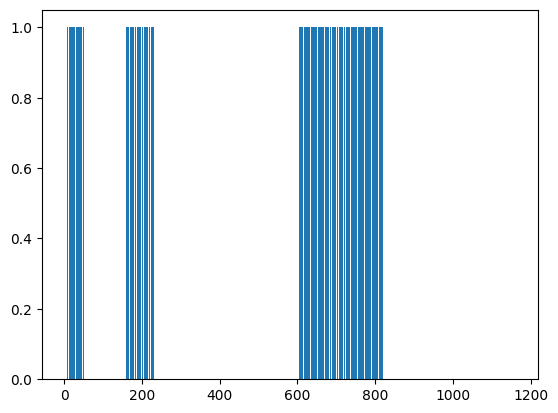

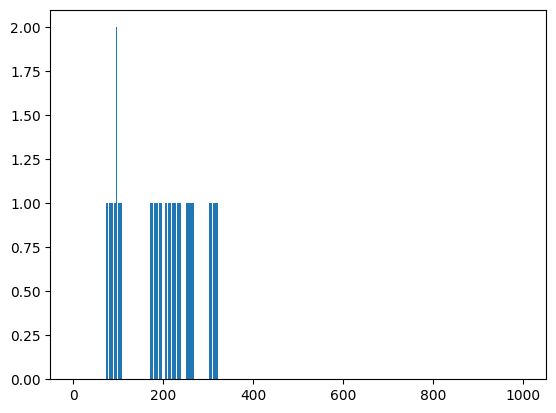

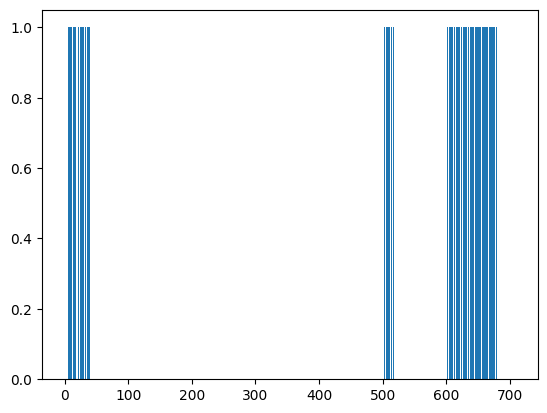

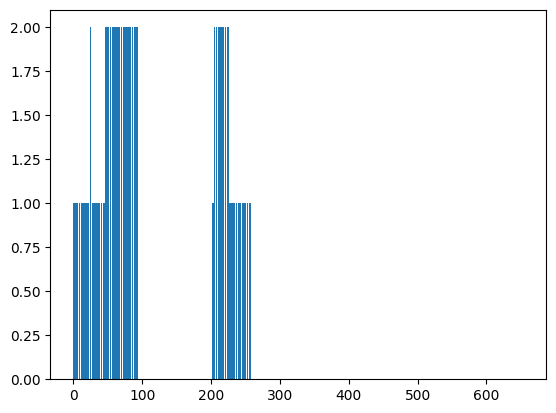

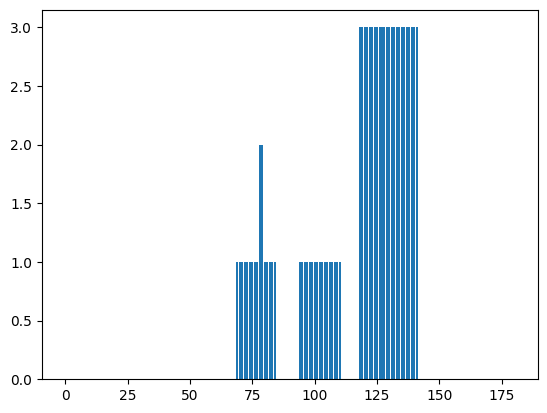

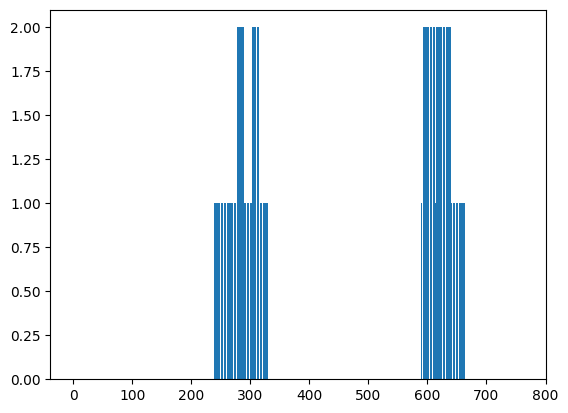

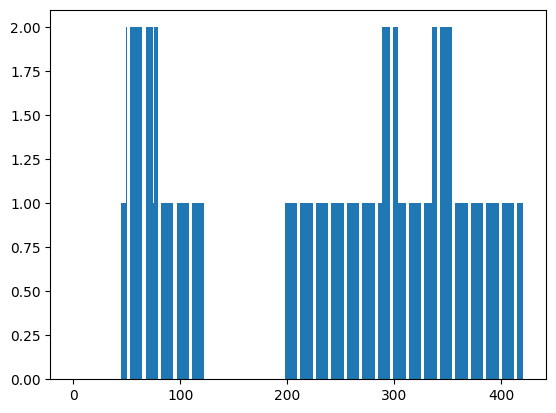

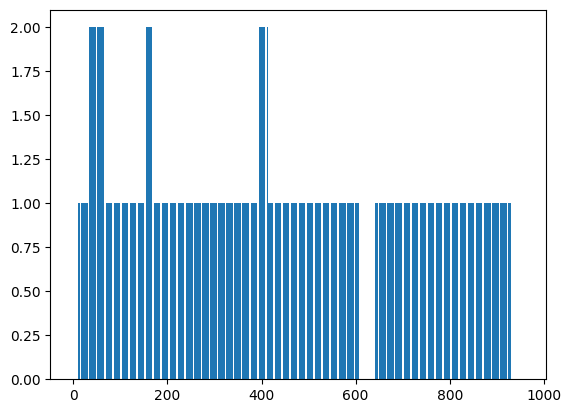

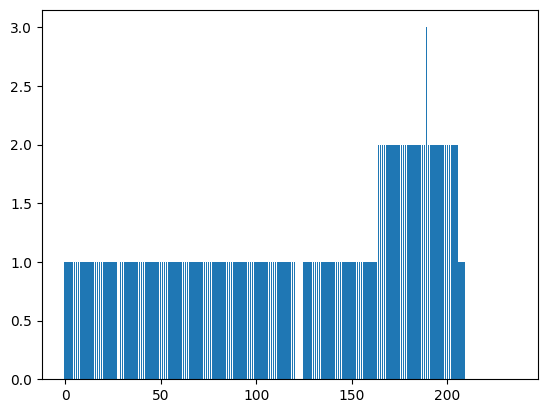

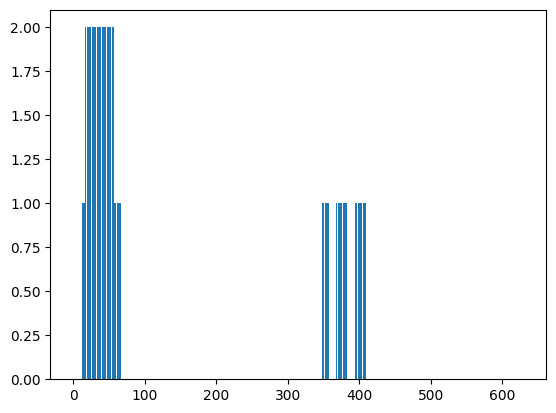

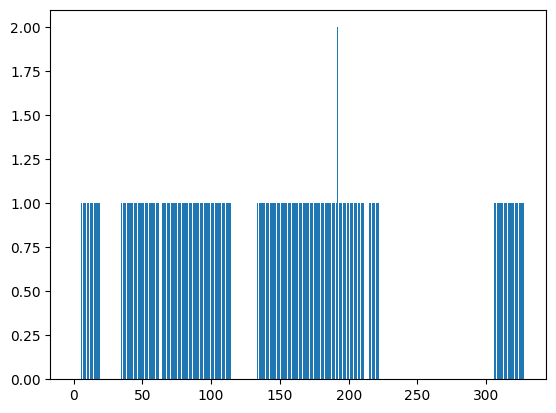

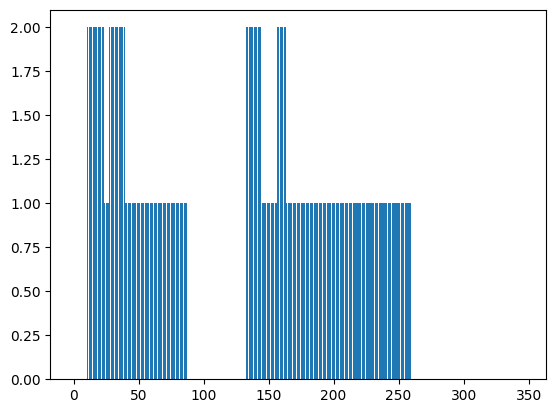

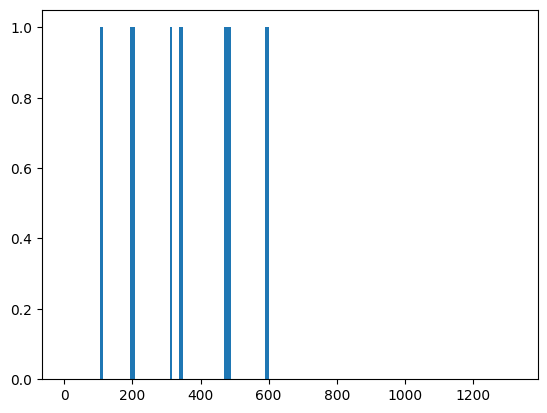

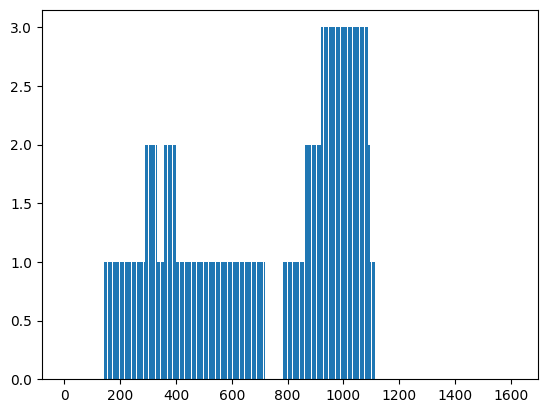

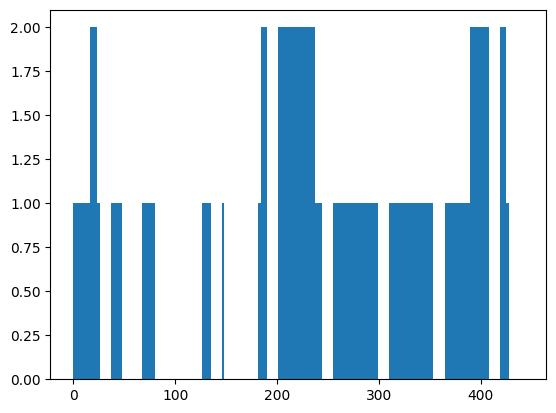

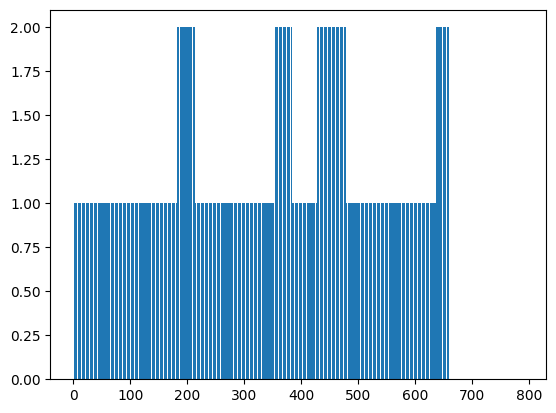

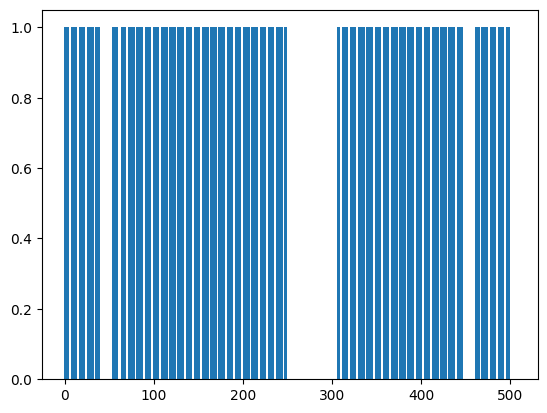

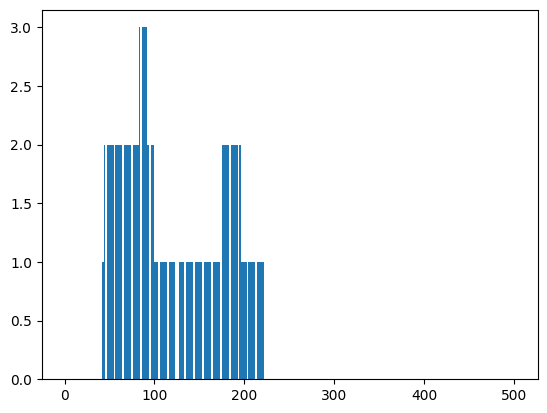

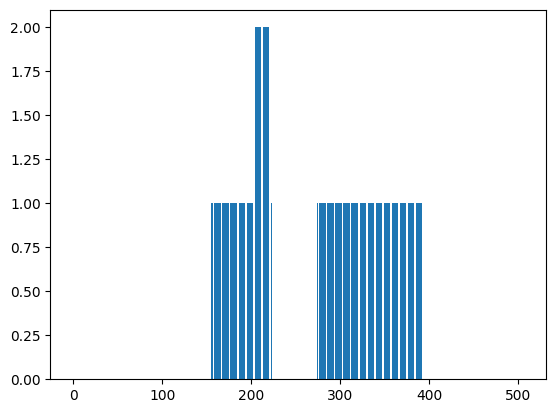

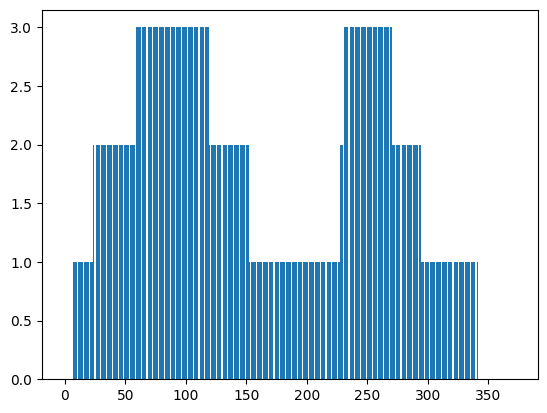

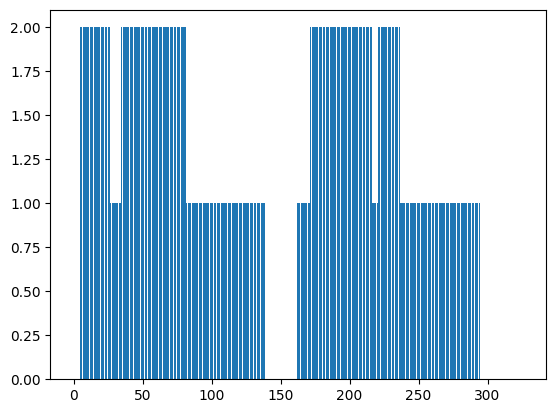

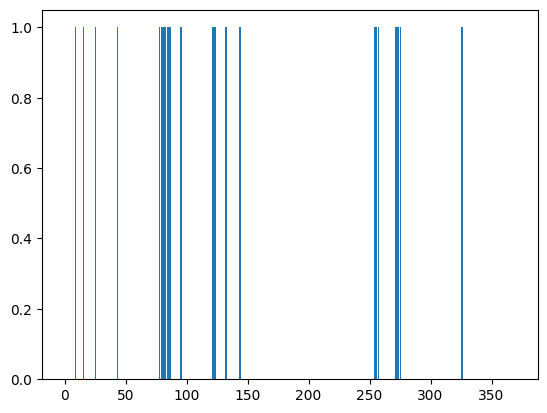

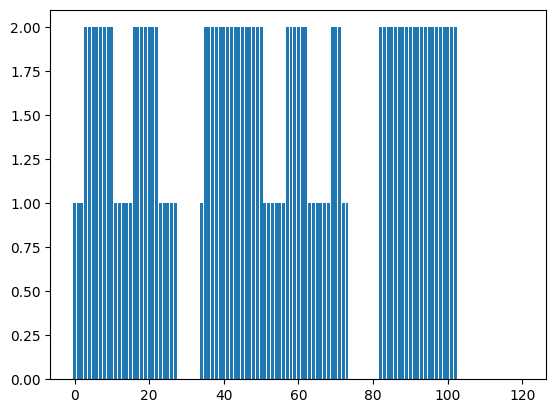

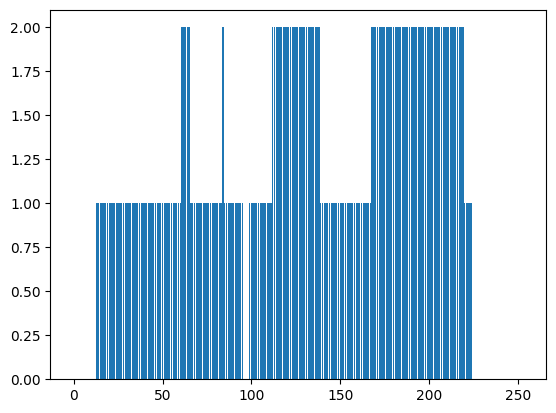

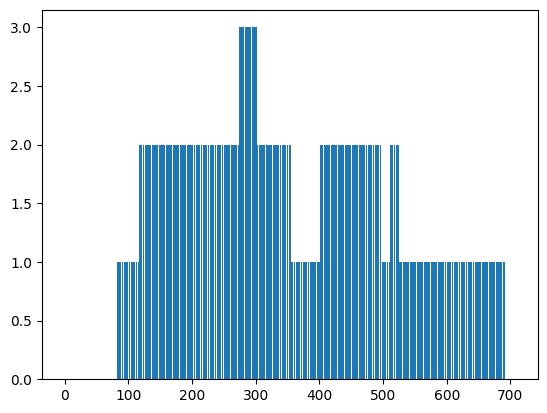

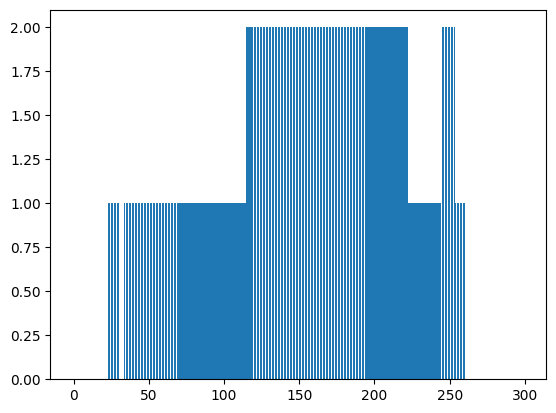

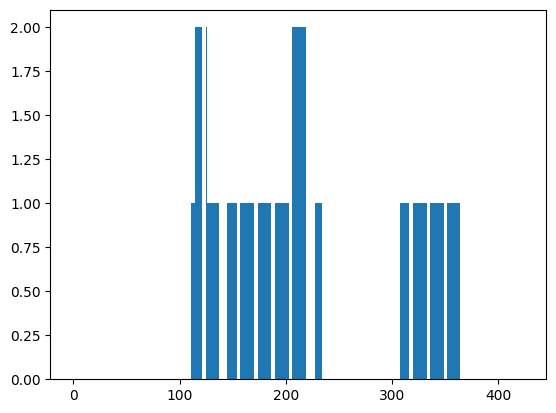

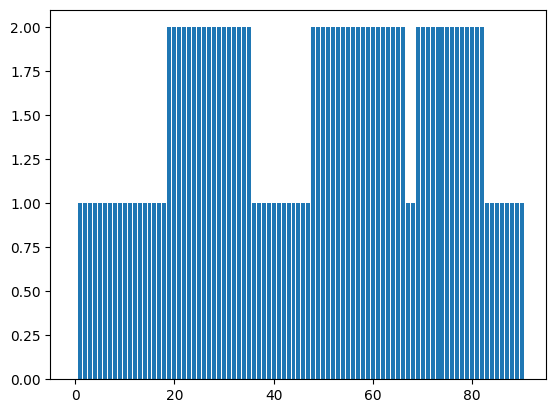

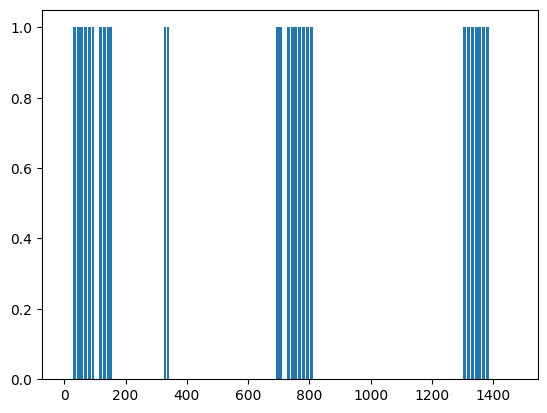

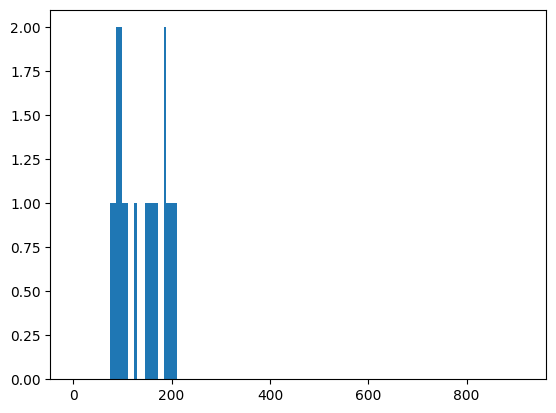

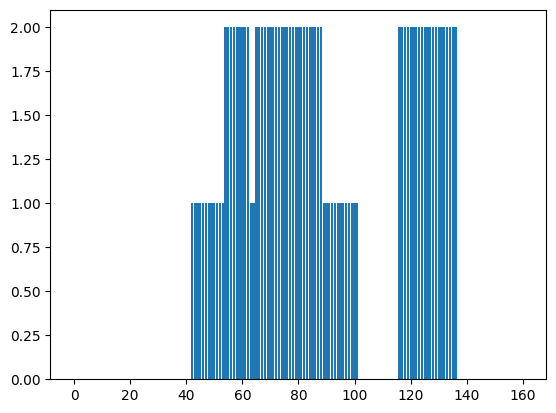

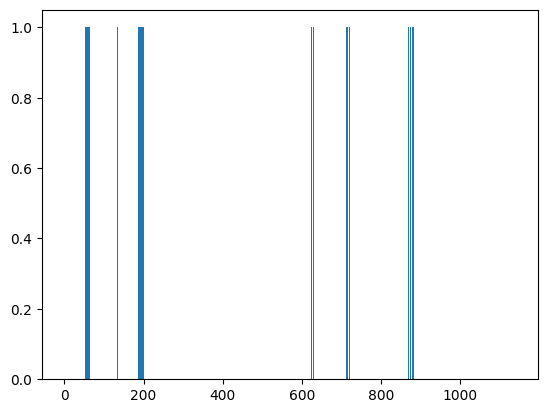

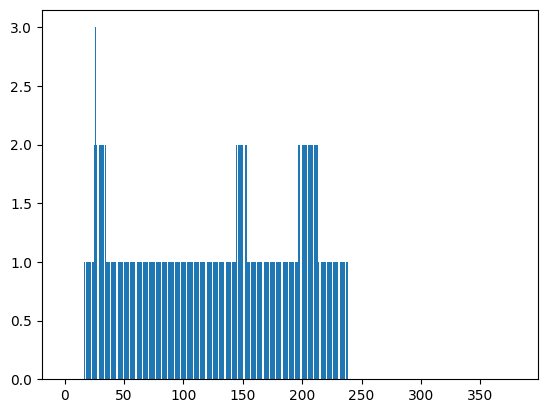

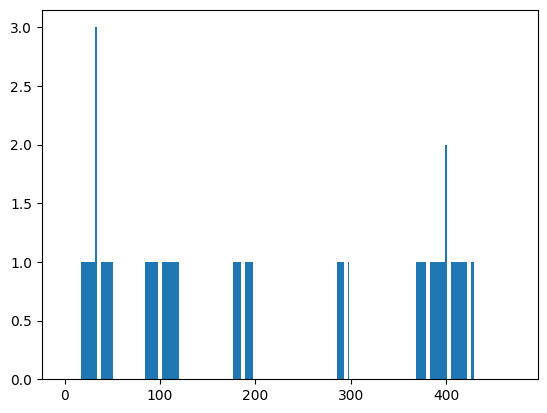

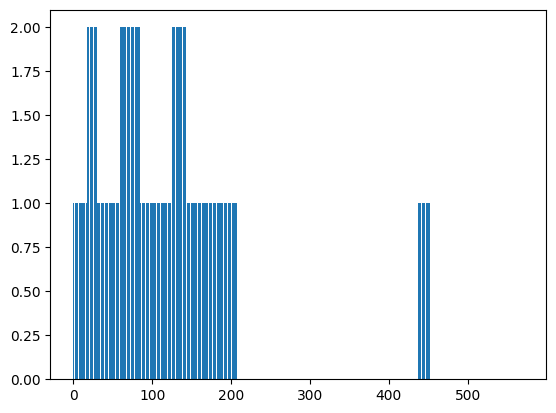

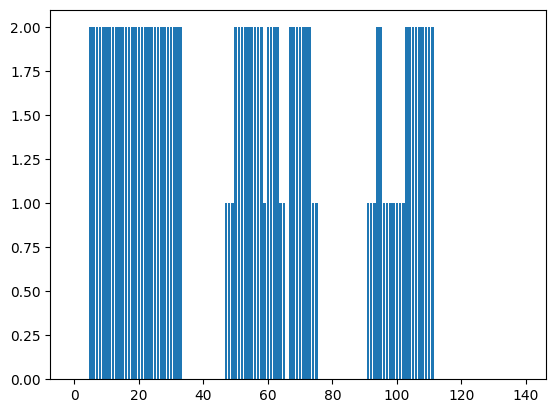

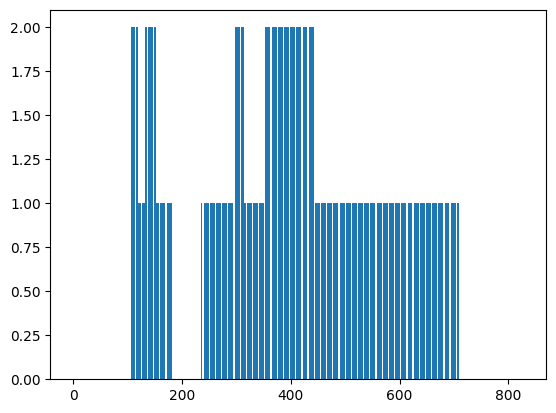

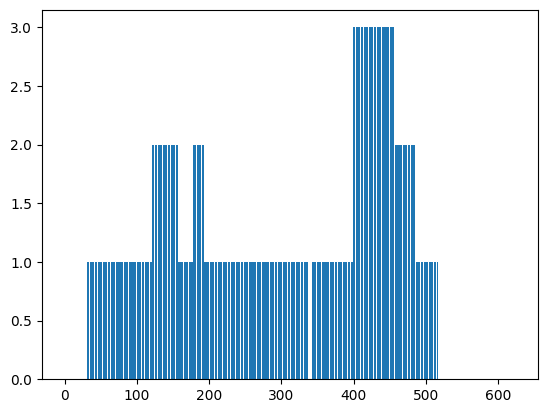

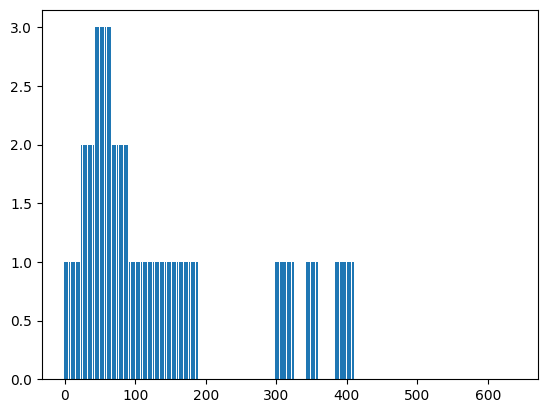

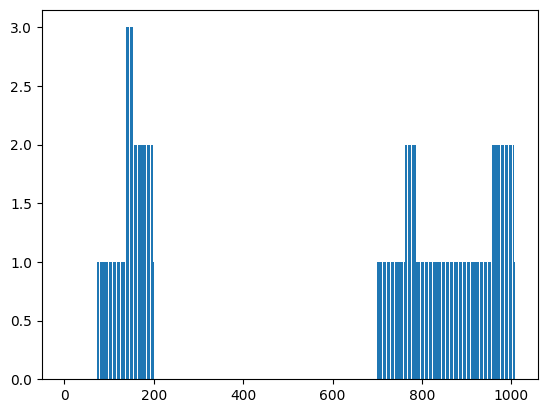

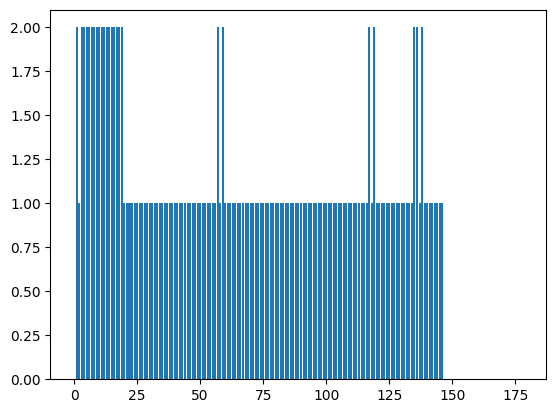

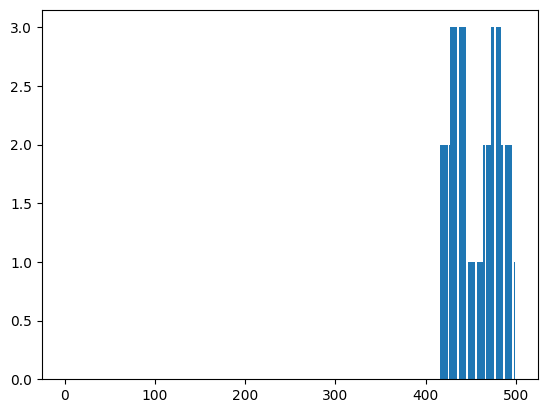

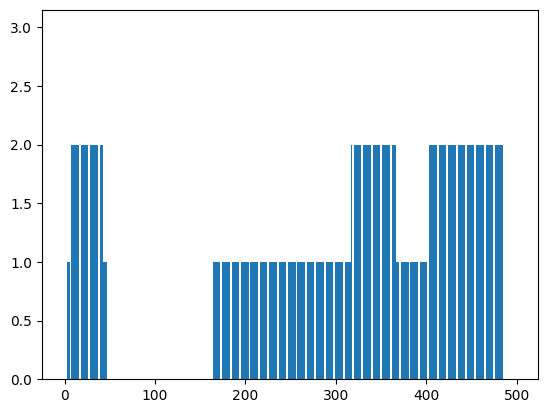

In [6]:
import matplotlib.pyplot as plt
for _, val in retrieved_stat.items():
  plt.bar(x = range(len(val)), height = val)
  plt.show()

In [121]:
full_train_doc = ""
for doc in docs["train"]:
  full_train_doc += doc

In [122]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
  model_name="gpt-4",
  chunk_size=800,
  chunk_overlap=400,
)

train_chunks = text_splitter.split_text(full_train_doc)
len(train_chunks)

4618

In [123]:
train_chunks[0]

"Hi .\nHi .\nHello .\n{vocalsound}\nOh .\nGood morning .\nGood morning .\nMorning .\nGood morning .\nUh before I start with the with the meeting I have a few things to tell you about the the setting we're in , uh because we're uh being watched by uh Big Brother . So um {disfmarker}\nBy Big Brother ?\nYeah . {vocalsound} Yeah .\n{vocalsound}\nOkay .\nThis uh {disfmarker} These are cameras , so are these . This thing uh that looks like a pie ,\nMm-hmm .\nare actually all microphones .\nYeah . Okay .\nSo you must be careful with uh with uh all this . And uh as I can see you uh you have placed your laptops uh exactly on the place where it must be . And that has to do with the camera settings , so we don't have our uh laptops in front of the cameras .\nOf our faces .\nAnd {disfmarker} Indeed . So they can see our faces .\n{vocalsound}\n{vocalsound} Okay .\n{vocalsound}\nWelcome at the kick-off meeting . My name is uh Danny Wolfs . {vocalsound} Uh this is the agenda for today . Uh first a li

In [124]:
full_val_doc = ""
for doc in docs["val"]:
  full_val_doc += doc

full_test_doc = ""
for doc in docs["test"]:
  full_test_doc += doc

val_chunks = text_splitter.split_text(full_val_doc)
test_chunks = text_splitter.split_text(full_test_doc)

len(val_chunks), len(test_chunks)

(1052, 1073)

In [125]:
### chunk datasets
import numpy as np
len_chunks = []
for d in sub_dir:
  for i in range(len(datasets[d])):
    retrieved_list = datasets[d][i]["retrieved"]
    retrieved_doc = "\n".join(retrieved_list)
    chunks = text_splitter.split_text(retrieved_doc)
    if d == "train":
      len_chunks.append(len(chunks))
    datasets[d][i]["chunks"] = chunks

max(len_chunks), np.mean(len_chunks), min(len_chunks)

(25, np.float64(2.428310502283105), 1)

In [126]:
### chunk datasets with our chunks
chunk_map = {"train": train_chunks, "val": val_chunks, "test": test_chunks}
import numpy as np
len_chunks = []
for d in sub_dir:
  for i in range(len(datasets[d])):
    retrieved_list = datasets[d][i]["retrieved"]
    retrieved_doc = "\n".join(retrieved_list)
    truth_chunks = text_splitter.split_text(retrieved_doc)
    chunk_list = [chunk for chunk in chunk_map[d] 
                        for truth_chunk in truth_chunks 
                        if truth_chunk in chunk]
    if d == "train":
      if len(chunk_list) == 0:
        print(truth_chunks)
      len_chunks.append(len(chunk_list))
    datasets[d][i]["recursive_chunks"] = chunk_list

max(len_chunks), np.mean(len_chunks), min(len_chunks)

["Um {disfmarker} So now it's time uh for us to uh going uh to discuss a little uh things . You can think about uh experience with a remote control uh yourself , at home . What you think might be uh a useful uh new feature . What uh what can distinguish our new trendy remote control from all the others . Um so uh let's uh let's uh discuss a little . I'm gonna join you at the table . {vocalsound} Well what what's the most uh important thing at a remote control ?\nUm well I think the most important thing of a remote control is that you can switch channels . And my opinion is you should keep it as basic as possible . Uh {disfmarker}\nOkay . So not a not a remote control who uh uh which can uh can be used for television and a D_V_D_ and radio and {disfmarker} Or just only {disfmarker}\nYeah . I think so . Uh but I have some points . Can I show them on the on the big screen ? Maybe ?\nIf you have them on uh {disfmarker} I can uh {disfmarker}\nYeah . Yeah , I can find {disfmarker} Uh .\nOkay

(22, np.float64(1.6100456621004566), 0)

In [127]:
for d in datasets["train"]:
    print(d['query'])

Summarize the discussion about financial targets of the new remote control project.
What did the group discuss about new remote control features?
What did Project Manager think about new remote control features proposed by Marketing?
What did Marketing recommend to do and why when discussing new useful features of the new remote control?
What did the group plan to discuss for the next meeting?
What did PhD A say about microphones?
What did the team say about incorporating video recordings
What decision was reached about microphones nonuniformity?
What was said about IBM transcription?
What was suggested for the transcribers?
What’s the current status of transcription?
What did the group discuss about components of the remote control and what is the conclusion of the discussion?
What did Industrial Designer suggest about the simple push button when discussing the components of the remote?
What did User Interface think about the voice recognition system of the remote when discussing the 

In [128]:
# Process negative sample data
import pandas as pd

neg_data = pd.read_csv("./transcripts.csv")
neg_full_doc = ""

for i in range(len(neg_data)):
    neg_full_doc += neg_data.iloc[0, :].text + "\n"

In [129]:
# Add more negative
with open("./biden-sotu-2023-autogenerated-transcript.txt") as f:
    t = f.read()
    neg_full_doc += t

In [130]:
neg_data.iloc[0,:].text, len(neg_data)

("let's go do it again let's show him why", 130728)

In [131]:
neg_chunks = text_splitter.split_text(neg_full_doc)
len(neg_chunks)

3990

In [132]:
neg_chunks[-1]

"never happened\n\nwe must all speak out\n\nthere's no place for political violence\n\nin America we have to protect the right\n\nto vote not suppress the fat fundamental\n\nright honor the results of our elections\n\nnot subvert the will of people we have\n\nto uphold the rule of law and restore\n\ntrust in our institutions of democracy\n\nand we must give hate and extremism in\n\nany form no Safe Harbor\n\n[Applause]\n\nlet's not be a partisan issue\n\nit's an American issue\n\nevery generation American has faced a\n\nmoment where they haven't been called to\n\nprotect our democracy defendants stand\n\nup for it\n\nand this is our moment\n\nmy fellow Americans\n\nwe meet tonight at an inflection point\n\none of those moments\n\nthan only a few Generations ever face\n\nwith the direction\n\nwe now take is going to decide the\n\ncourse of this nation for decades to\n\ncome\n\nwe're not bystanders of History\n\nwe're not powerless before the forces\n\nthat confront us\n\nit's within our

In [133]:
all_val_lines = set(line.strip() for line in full_val_doc.split("\n"))
all_test_lines = set(line.strip() for line in full_val_doc.split("\n"))

## Train

### base model

In [174]:
from sentence_transformers import SentenceTransformer
from langchain_community.embeddings import HuggingFaceEmbeddings
model_names = ["all-MiniLM-L6-v2",'sentence-transformers/multi-qa-MiniLM-L6-cos-v1', 
               "sentence-transformers/all-MiniLM-L12-v2", 
               "sentence-t5-base", "BAAI/bge-base-en-v1.5", "GTR-base", "GTR-large"]
# base_model = SentenceTransformer("all-MiniLM-L6-v2")
model = model_names[4]
base_model = SentenceTransformer(model)

In [245]:
for i, name in enumerate(model_names):
    temp = SentenceTransformer(name)
    
    print(f"model {i}: params={temp.get_sentence_embedding_dimension()}")

model 0: params=384
model 1: params=384
model 2: params=384
model 3: params=768
model 4: params=768


No sentence-transformers model found with name sentence-transformers/GTR-base. Creating a new one with mean pooling.


OSError: sentence-transformers/GTR-base is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [175]:
from chromadb import Documents, EmbeddingFunction, Embeddings

class MyEmbeddingFunction(EmbeddingFunction[Documents]):
    def __init__(self, base_model):
        self.base_model = base_model
        
    def __call__(self, input: Documents) -> Embeddings:
        """Embed the input documents."""
        return self.base_model.encode(input)
    def name(self) -> str:
        return "default"
        
embed = MyEmbeddingFunction(base_model)

### Vector DB

In [176]:
import chromadb

path = r"./chromadb/" + model + "process_4"
client = chromadb.PersistentClient(path=path)

train_collection = client.get_or_create_collection(name="train", metadata={"hnsw:space": "cosine"}, embedding_function=embed)
val_collection = client.get_or_create_collection(name="val", metadata={"hnsw:space": "cosine"}, embedding_function=embed)
test_collection = client.get_or_create_collection(name="test", metadata={"hnsw:space": "cosine"}, embedding_function=embed)

In [177]:
## add data
from uuid import uuid4
for chunk in train_chunks:
  train_collection.add(
    documents=[chunk],
    ids=[str(uuid4())]
  )

In [178]:
for chunk in val_chunks:
  val_collection.add(
    documents=[chunk],
    ids=[str(uuid4())]
  )

for chunk in test_chunks:
  test_collection.add(
    documents=[chunk],
    ids=[str(uuid4())]
  )

### Retrieval function

In [179]:
def retrieve_documents_embeddings(query_embedding, collection, k=10):
  query_embedding_list = query_embedding.tolist()

  results = collection.query(
    query_embeddings=[query_embedding_list],
    n_results=k
  )
  return results["documents"][0]

### Eval Function

In [180]:
import numpy as np

def reciprocal_rank(retrieved_docs, ground_truth, k):
  try:
    rank = retrieved_docs.index(ground_truth) + 1
    return 1.0 / rank if rank <= k else 0.0
  except ValueError:
    return 0.0

In [181]:
def hit_rate(retrieved_docs, ground_truth, k):
  return 1.0 if ground_truth in retrieved_docs[:k] else 0.0

In [182]:
def hit_rate_at_50(retrieved_docs, ground_truth, k):
    gt_lines = set(line.strip() for line in ground_truth.strip().split("\n") if line.strip())
    retrieved_lines = set(line.strip() for chunk in retrieved_docs for line in chunk.strip().split("\n") if line.strip())
    return 1.0 if len(gt_lines & retrieved_lines) / len(gt_lines) > 0.5 else 0

def reciprocal_rank_at_50(retrieved_docs, ground_truth, k):
  gt_lines = set(line.strip() for line in ground_truth.strip().split("\n") if line.strip())
  for i in range(k):
      retrieved_lines = set(line.strip() for line in retrieved_docs[i].strip().split("\n") if line.strip())
      if len(gt_lines & retrieved_lines) / len(gt_lines) > 0.5:
          return 1.0 / (i + 1)
  return 0.0

In [183]:
from rouge_score import rouge_scorer
import evaluate
import datasets as ds
from ignite.metrics import RougeL

def rouge_l(retrieved_docs, ground_truth, k):
  max_f1 = 0.0
  max_score = None
  m = RougeL(multiref="best")
  m.update(([doc.split("\n") for doc in retrieved_docs[:k]], [ground_truth.split("\n")]))
  results = m.compute()
  return results

def lsc_by_line(retrieved_docs, ground_truth, k):
  best_result = {"precision":0, "recall":0, "f1":0}
  for doc in retrieved_docs:
    c = 0
    for line in ground_truth.split("\n"):
      for d in doc.split("\n"):
        if line.strip() == d.strip():
          c += 1
          break
    precision = (c / len(doc.split("\n")))
    recall = (c / len(ground_truth.split("\n")))
    f1 = 2*precision*recall/ (precision+recall + 1e-5)
    if f1 > best_result["f1"]:
      best_result["f1"] = f1
      best_result["precision"] = precision
      best_result["recall"] = recall
  return best_result

In [184]:
len(datasets["val"])

237

In [185]:
from typing import List, Tuple, Set
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


def validate_retrieval(
    queries: List[str],
    ground_truths: List[List[str]],
    all_possible_lines: Set[str],
    collection,
    top_k: int = 5
) -> Tuple[float, float, float, float, float]:
    """
    Compute precision, recall, F1, accuracy, and IoU for line-based retrieval.

    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    IoU = TP / (TP + FP + FN)
    """
    precision_list = []
    recall_list = []
    f1_list = []
    accuracy_list = []
    iou_list = []

    for query, gt_chunks in zip(queries, ground_truths):
        gt_lines = set(line.strip() for chunk in gt_chunks for line in chunk.strip().split("\n") if line.strip())
        retrieved_chunks = retrieve_documents_embeddings(query, collection, top_k)
        retrieved_lines = set(line.strip() for chunk in retrieved_chunks for line in chunk.strip().split("\n") if line.strip())

        tp = len(gt_lines & retrieved_lines)
        fp = len(retrieved_lines - gt_lines)
        fn = len(gt_lines - retrieved_lines)
        tn = len(all_possible_lines - (gt_lines | retrieved_lines))

        precision = tp / (tp + fp) if (tp + fp) else 0.0
        recall = tp / (tp + fn) if (tp + fn) else 0.0
        f1 = 2 * precision * recall / (precision + recall + 1e-8) if (precision + recall) else 0.0
        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-8)
        iou = tp / (tp + fp + fn + 1e-8) if (tp + fp + fn) else 0.0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        accuracy_list.append(accuracy)
        iou_list.append(iou)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)
    avg_accuracy = np.mean(accuracy_list)
    avg_iou = np.mean(iou_list)

    return avg_precision, avg_recall, avg_f1, avg_accuracy, avg_iou

In [186]:
from tqdm import tqdm
def validate_embedding_model(val_data, base_model, adapter,all_val_lines, k=10, log=False, ):
  hit_rates = []
  reciprocal_ranks = []
  hit_rates_at_50 = []
  reciprocal_ranks_at_50 = []
  total_r = []
  total_p = []
  total_f = []
  print_first = log
  queries = []
  gt_list = []

  for data in val_data:
    #data = val_data[i]
    query = data["query"]
    ground_truths = data["chunks"]
    base_model.eval()
    adapter.eval()
    query_embedd = base_model.encode(query, convert_to_tensor=True)
    pred_embedd = adapter(query_embedd)

    queries.append(pred_embedd)
    gt_list.append(ground_truths)

    retrieved_docs = retrieve_documents_embeddings(pred_embedd, val_collection, k)

    if print_first:
      retrieved_docs_og = retrieve_documents_embeddings(query_embedd, val_collection, k)

      print("====Query====\n")
      print(query)
      print("====OG====\n")
      print(retrieved_docs_og[0])
      print("====FinedTune====\n")
      for i in range(5):
        print(i)
        print(retrieved_docs[i])
      print("====GroundTruth====\n")
      print(('\n'.join(ground_truths)))
      print_first= False
    #Calculate metrics
    for gt in ground_truths:
      hr = hit_rate(retrieved_docs, gt, k)
      rr = reciprocal_rank(retrieved_docs, gt, k)
      #rougeL = rouge_l(retrieved_docs, gt, k)
      # result = lsc_by_line(retrieved_docs, gt, k)
      

      hit_rates.append(hr)
      reciprocal_ranks.append(rr)
      hit_rates_at_50.append(hit_rate_at_50(retrieved_docs, gt, k))
      reciprocal_ranks_at_50.append(reciprocal_rank_at_50(retrieved_docs, gt, k))
      #total_r.append(rougeL["Rouge-L-R"])
      #total_p.append(rougeL["Rouge-L-P"])
      #total_f.append(rougeL["Rouge-L-F"])
      # total_r.append(result["recall"])
      # total_p.append(result["precision"])
      # total_f.append(result["f1"])
  avg_p, avg_r, avg_f, avg_acc, iou = validate_retrieval(queries, gt_list,all_val_lines, val_collection, k )
  avg_hit_rate = np.mean(hit_rates)
  avg_reciprocal_rank = np.mean(reciprocal_ranks)
  # avg_r = np.mean(total_r)
  # avg_p = np.mean(total_p)
  # avg_f = np.mean(total_f)

  return {
    "avg_hit_rate": avg_hit_rate,
    "avg_reciprocal_rank": avg_reciprocal_rank,
    "avg_hit_rate@50": np.mean(hit_rates_at_50),
    "avg_reciprocal_rank@50": np.mean(reciprocal_ranks_at_50),
    "recall":avg_r,
    "precision":avg_p,
    "f1":avg_f,
    "accuracy": avg_acc,
    "iou": iou,
  }

In [187]:
def eval_test(test_data, base_model, adapter, k=10):
  hit_rates = []
  reciprocal_ranks = []
  total_r = []
  total_p = []
  total_f = []
  hit_rates_at_50 = []
  reciprocal_ranks_at_50 = []
  queries = []
  gt_list = []
  for data in test_data:
    query = data["query"]
    ground_truths = data["chunks"]

    query_embedd = base_model.encode(query, convert_to_tensor=True)
    pred_embedd = adapter(query_embedd)
    queries.append(pred_embedd)
    gt_list.append(ground_truths)
    retrieved_docs = retrieve_documents_embeddings(pred_embedd, test_collection, k)

    #Calculate metrics
    for gt in ground_truths:
        hr = hit_rate(retrieved_docs, gt, k)
        rr = reciprocal_rank(retrieved_docs, gt, k)
        # result = lsc_by_line(retrieved_docs, gt, k)
      
        hit_rates_at_50.append(hit_rate_at_50(retrieved_docs, gt, k))
        reciprocal_ranks_at_50.append(reciprocal_rank_at_50(retrieved_docs, gt, k))
        hit_rates.append(hr)
        reciprocal_ranks.append(rr)
        # total_r.append(result["recall"])
        # total_p.append(result["precision"])
        # total_f.append(result["f1"])
  avg_hit_rate = np.mean(hit_rates)
  avg_reciprocal_rank = np.mean(reciprocal_ranks)
  # avg_r = np.mean(total_r)
  # avg_p = np.mean(total_p)
  # avg_f = np.mean(total_f)
  avg_p, avg_r, avg_f, avg_acc, iou = validate_retrieval(queries, gt_list,all_test_lines, test_collection, k )

  return {
    "avg_hit_rate": avg_hit_rate,
    "avg_reciprocal_rank": avg_reciprocal_rank,
    "avg_hit_rate@50": np.mean(hit_rates_at_50),
    "avg_reciprocal_rank@50": np.mean(reciprocal_ranks_at_50),
    "recall":avg_r,
    "precision":avg_p,
    "f1":avg_f,
    "accuracy": avg_acc,
    "iou": iou,
  }

In [188]:
def eval_base_model(test_data, base_model, k=10):
  hit_rates = []
  reciprocal_ranks = []
  total_r = []
  total_p = []
  total_f = []
  hit_rates_at_50 = []
  reciprocal_ranks_at_50 = []
  queries = []
  gt_list = []
  for data in test_data:
    query = data["query"]
    ground_truths = data["chunks"]

    query_embedd = base_model.encode(query, convert_to_tensor=True)
    queries.append(query_embedd)
    gt_list.append(ground_truths)

    retrieved_docs = retrieve_documents_embeddings(query_embedd, test_collection, k)

    #Calculate metrics
    for gt in ground_truths:
        hr = hit_rate(retrieved_docs, gt, k)
        rr = reciprocal_rank(retrieved_docs, gt, k)
        # result = lsc_by_line(retrieved_docs, gt, k)
      
        hit_rates_at_50.append(hit_rate_at_50(retrieved_docs, gt, k))
        reciprocal_ranks_at_50.append(reciprocal_rank_at_50(retrieved_docs, gt, k))
        hit_rates.append(hr)
        reciprocal_ranks.append(rr)
        # total_r.append(result["recall"])
        # total_p.append(result["precision"])
        # total_f.append(result["f1"])
  avg_hit_rate = np.mean(hit_rates)
  avg_reciprocal_rank = np.mean(reciprocal_ranks)
  # avg_r = np.mean(total_r)
  # avg_p = np.mean(total_p)
  # avg_f = np.mean(total_f)
  avg_p, avg_r, avg_f, avg_acc, iou = validate_retrieval(queries, gt_list,all_test_lines, test_collection, k )
  return {
    "avg_hit_rate": avg_hit_rate,
    "avg_reciprocal_rank": avg_reciprocal_rank,
    "avg_hit_rate@50": np.mean(hit_rates_at_50),
    "avg_reciprocal_rank@50": np.mean(reciprocal_ranks_at_50),
    "recall":avg_r,
    "precision":avg_p,
    "f1":avg_f,
    "accuracy": avg_acc,
    "iou": iou
  }

### Dataloader

In [189]:
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR
from torch.nn.utils import clip_grad_norm_

In [190]:
import re
def is_sentence_overlap(text1: str, text2: list[str]) -> bool:
    # Split text1 into sentences using a simple regex pattern
    sentences = re.split(r'(?<=[.!?])\s+', text1.strip())

    # Normalize the text2 items for comparison
    text2_set = set(s.strip() for s in text2 if s.strip())

    # Check for any overlap
    for sentence in sentences:
        clean_sentence = sentence.strip()
        if clean_sentence in text2_set:
            return True
    return False

In [191]:
class TripletDataset(Dataset):
  def __init__(self, data, neg_data, base_model, collection, adapter):
    self.data = []
    self.base_model = base_model
    self.adapter = adapter
    self.neg_data = neg_data
    self.collection = collection
    for d in data:
      self.data.append((d["query"], d["chunks"]))
    print(len(self.data))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    query, pos_chunks = self.data[idx]
    query_embed = self.base_model.encode(query,  convert_to_tensor=True)
    pred_embed = self.adapter(query_embed)
    pos_chunk = random.choice(pos_chunks)
    neg_idx = random.randint(0, len(self.neg_data) - 1)
    neg_chunk1 = self.neg_data[neg_idx]
    neg_idx = idx
    neg_query, neg_chunk2 = None, None
    hard_neg = None
    while neg_idx == idx or is_sentence_overlap(neg_chunk2, pos_chunks):
      neg_idx = random.randint(0, len(self.data) - 1)
      neg_query, neg_chunks = self.data[neg_idx]
      neg_chunk2 = random.choice(neg_chunks)
    hard_negs = retrieve_documents_embeddings(pred_embed, self.collection, 10)
    for chunk in hard_negs:
        if not is_sentence_overlap(chunk, pos_chunks):
            hard_neg = chunk
            break
    if not hard_neg:
        neg_chunk = random.choice([neg_chunk1, neg_chunk2])
    else:
         neg_chunk = random.choices([neg_chunk1, neg_chunk2, hard_neg], weights=[35, 35, 30], k=1)[0]
    return query, pos_chunk, neg_chunk

In [192]:
def triplet_collate_fn(batch):
    queires, pos, neg = zip(*batch)
    return list(queires), list(pos), list(neg)

In [129]:
train_dataset = TripletDataset(datasets["train"], neg_chunks,base_model=base_model, collection = train_collection)

TypeError: TripletDataset.__init__() missing 1 required positional argument: 'adapter'

### Linear Adapter

In [193]:
base_model.get_sentence_embedding_dimension()

768

In [194]:
class LinearAdapter(nn.Module):
  def __init__(self, input_dim, hidden_dim=128):
    super().__init__()
    self.linear = nn.Linear(input_dim, input_dim)
  def forward(self, x):
    return self.linear(x)

### Train

In [195]:
def get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps):
  def lr_lambda(current_step):
    if current_step < num_warmup_steps:
      return float(current_step) / float(max(1, num_warmup_steps))
    return max(0.0, float(num_training_steps - current_step) / \
               float(max(1, num_training_steps - num_warmup_steps)))
  return LambdaLR(optimizer, lr_lambda)

In [199]:
import torch.nn.functional as F
def train_linear_adapter(base_model, num_epochs=10, batch_size=32,
                        learning_rate=2e-5, warmup_steps=100, max_grad_norm=1.0, 
                         margin=1.0, hidden_dim=128):
  val_metrics = []
  train_loss = []
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  adapter = LinearAdapter(base_model.get_sentence_embedding_dimension(), hidden_dim).to(device)

  train_dataset = TripletDataset(datasets["train"], neg_chunks,base_model=base_model, 
                                 collection = train_collection, adapter=adapter)
  triplet_loss = nn.TripletMarginLoss(margin=margin, p=2)
  # triplet_loss = nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1 - F.cosine_similarity(x, y), margin=margin)

  optimizer = AdamW(adapter.parameters(), lr=learning_rate)

  dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=triplet_collate_fn)

  total_steps = len(dataloader) * num_epochs

  scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps,
                                             num_training_steps=total_steps)

  # Training loop
  best_f1 = 0
  for epoch in range(num_epochs):
    total_loss = 0
    pos_dist = 0
    neg_dis = 0
    for batch in dataloader:
      adapter.train()
      queries, pos, neg = batch

      query_emb = base_model.encode(queries, convert_to_tensor=True)
      pos_emb = base_model.encode(pos, convert_to_tensor=True)
      neg_emb = base_model.encode(neg, convert_to_tensor=True)

      #Forward pass
      pred_emb = adapter(query_emb)

      #Compute loss
      loss = triplet_loss(pred_emb, pos_emb, neg_emb)

      #Backprop
      optimizer.zero_grad()
      loss.backward()
      #Gradient clipping
      clip_grad_norm_(adapter.parameters(), max_grad_norm)

      optimizer.step()
      scheduler.step()

      total_loss += loss.item()
      
      pos_dist = torch.norm(pred_emb - pos_emb, dim=1).mean().item()
      neg_dist = torch.norm(pred_emb - neg_emb, dim=1).mean().item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, pos_dist: {pos_dist:.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, neg_dist: {neg_dist:.4f}")
    with torch.no_grad():
      base_model.eval()
      adapter.eval()
      metrics = validate_embedding_model(datasets["val"], base_model, adapter, all_val_lines, 10)
      print("====Validate====")
      print(metrics)
      if metrics["f1"] > best_f1:
          print("===SAVE BEST===")
          print(f"before: {best_f1}, now: {metrics['f1']}")
          print("=========")
          best_f1 = metrics["f1"]
          save_dict = {
              "adapter_state_dict": adapter.state_dict(),
              "adapter_kwargs": adapter_kwargs,
              "train_losses": train_loss,
              "val_metrics": val_metrics
          }
          torch.save(save_dict, f"./train/process-4-{'-'.join(model.split('/'))}-best.pth")
      val_metrics.append(metrics)
      train_loss.append( (total_loss/len(dataloader)) )
  return adapter, train_loss, val_metrics

In [200]:
adapter_kwargs = {
  "num_epochs": 75,
  "batch_size": 128,
  "learning_rate": 3e-3,
  "warmup_steps": 100,
  "max_grad_norm": 1.0,
  'margin': 0.8,
  "hidden_dim": 256,
}

trained_adapter, train_loss, val_metrics = train_linear_adapter(base_model, **adapter_kwargs)

1095
Epoch 1/75, Loss: 0.7910
Epoch 1/75, pos_dist: 1.2484
Epoch 1/75, neg_dist: 1.3007
====Validate====
{'avg_hit_rate': np.float64(0.011647254575707155), 'avg_reciprocal_rank': np.float64(0.005828249214272508), 'avg_hit_rate@50': np.float64(0.05490848585690516), 'avg_reciprocal_rank@50': np.float64(0.014782241238148058), 'recall': np.float64(0.1578831181243669), 'precision': np.float64(0.018149490708617384), 'f1': np.float64(0.028949906361205056), 'accuracy': np.float64(0.9779711661208316), 'iou': np.float64(0.01515988498800459)}
===SAVE BEST===
before: 0, now: 0.028949906361205056
Epoch 2/75, Loss: 0.6771
Epoch 2/75, pos_dist: 1.4723
Epoch 2/75, neg_dist: 1.6992
====Validate====
{'avg_hit_rate': np.float64(0.011647254575707155), 'avg_reciprocal_rank': np.float64(0.004511000184877057), 'avg_hit_rate@50': np.float64(0.07154742096505824), 'avg_reciprocal_rank@50': np.float64(0.020932044476137654), 'recall': np.float64(0.18723379813598434), 'precision': np.float64(0.02070708941292369), 

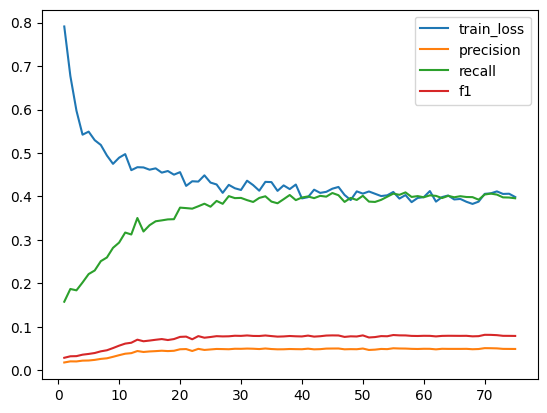

In [201]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(adapter_kwargs["num_epochs"])]
precision = [val["precision"] for val in val_metrics]
recall = [val["recall"] for val in val_metrics]
f1 = [val["f1"] for val in val_metrics]

def norm(y):
  return (np.array(y) - min(y))/ (max(y) - min(y))

plt.plot(x, (train_loss), label="train_loss")
plt.plot(x, precision, label="precision")
plt.plot(x,recall, label="recall")
plt.plot(x, f1, label="f1")
plt.legend()
plt.show()

In [202]:
loaded_dict = torch.load(f"./train/process-4-{'-'.join(model.split('/'))}-best.pth", weights_only=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_adapter = LinearAdapter(base_model.get_sentence_embedding_dimension()).to(device)
trained_adapter.load_state_dict(loaded_dict['adapter_state_dict'])

<All keys matched successfully>

In [203]:
import json
with torch.no_grad():
    
    base_model.eval()
    trained_adapter.eval()
    metrics = eval_test(datasets["test"], base_model, trained_adapter, 10)
    print("====TEST====")
    print(metrics)
    test_path = f"./results/process-4-{model.replace('/', '-')}-best.json"
    with open(test_path, "w") as f:
        json.dump(metrics, f)

====TEST====
{'avg_hit_rate': np.float64(0.017605633802816902), 'avg_reciprocal_rank': np.float64(0.006665688575899843), 'avg_hit_rate@50': np.float64(0.24471830985915494), 'avg_reciprocal_rank@50': np.float64(0.10072169125866309), 'recall': np.float64(0.36503655517849054), 'precision': np.float64(0.03973396785852078), 'f1': np.float64(0.06525114223609917), 'accuracy': np.float64(0.9796280774968856), 'iou': np.float64(0.03602091745029199)}


In [204]:
import json
with torch.no_grad():
    base_model.eval()
    metrics = eval_base_model(datasets["test"], base_model, k=10)
    print("====TEST_BASE_MODEL====")
    print(metrics)
    test_path = f"./results/base-{model.replace('/', '-')}.json"
    with open(test_path, "w") as f:
        json.dump(metrics, f)

====TEST_BASE_MODEL====
{'avg_hit_rate': np.float64(0.02992957746478873), 'avg_reciprocal_rank': np.float64(0.019820310753409346), 'avg_hit_rate@50': np.float64(0.301056338028169), 'avg_reciprocal_rank@50': np.float64(0.16530642186452046), 'recall': np.float64(0.48385943896761574), 'precision': np.float64(0.0488128077854809), 'f1': np.float64(0.08059293554872596), 'accuracy': np.float64(0.9810212018226565), 'iou': np.float64(0.044495281809987734)}


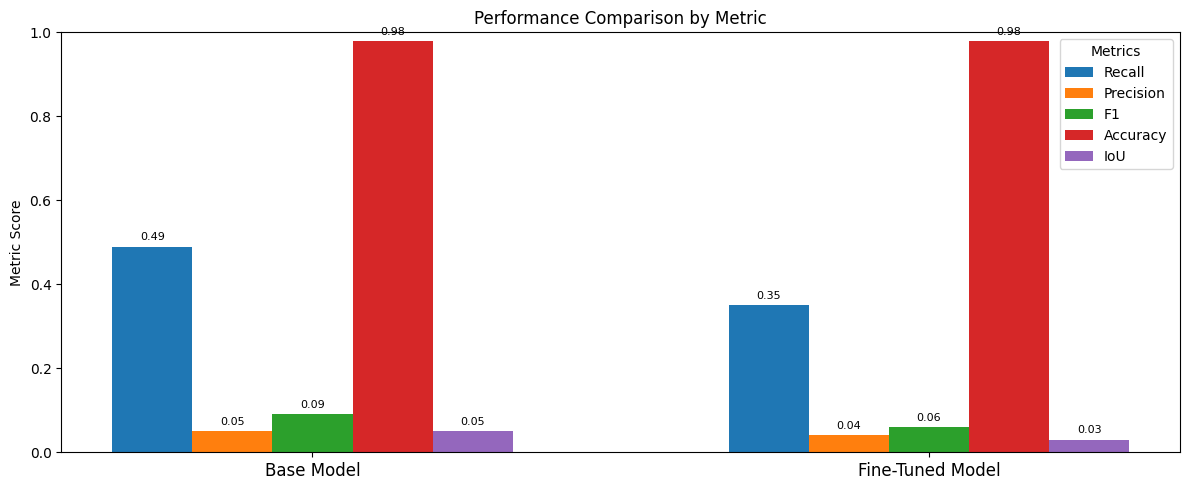

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics: (replace with your actual results)
# categories = ['Precision', 'Recall', 'Accuracy', 'F1', 'IoU']
categories = ['Recall', 'Precision', 'F1', 'Accuracy', 'IoU']
base = [ 0.49, 0.05, 0.09, 0.98, 0.05]       # from base model
fine_tuned = [0.35, 0.04, 0.06, 0.98, 0.03]  # from fine-tuned model

x = np.arange(2)  # ['Base Model', 'Fine-Tuned Model']
width = 0.13

fig, ax = plt.subplots(figsize=(12, 5))

# Offset bars for each metric
for i, (metric_name, b_val, f_val) in enumerate(zip(categories, base, fine_tuned)):
    offset = (i - len(categories)/2) * width + width/2
    ax.bar(x[0] + offset, b_val, width, label=metric_name if x[0]==0 else "", color=plt.cm.tab10(i))
    ax.bar(x[1] + offset, f_val, width, color=plt.cm.tab10(i))

    # Value labels
    ax.text(x[0] + offset, b_val + 0.01, f'{b_val:.2f}', ha='center', va='bottom', fontsize=8)
    ax.text(x[1] + offset, f_val + 0.01, f'{f_val:.2f}', ha='center', va='bottom', fontsize=8)

# Axis labels
ax.set_xticks(x)
ax.set_xticklabels(['Base Model', 'Fine-Tuned Model'], fontsize=12)
ax.set_ylabel('Metric Score')
ax.set_title('Performance Comparison by Metric')
ax.set_ylim(0, 1)
ax.legend(title="Metrics", loc='upper right')

plt.tight_layout()
plt.show()


In [92]:
save_dict = {
  "adapter_state_dict": trained_adapter.state_dict(),
  "adapter_kwargs": adapter_kwargs,
  "train_losses": train_loss,
  "val_metrics": val_metrics
}

torch.save(save_dict, f"./train/{model.replace('/', '-')}.pth")

## In-Batch Negatives

In [ ]:
class InBatchTripletDataset(Dataset):
  def __init__(self, data):
    self.pairs = []
    for item in data:
      query = item["query"]
      self.pairs += [(query, pos) for pos in item["query"]]

  def __len__(self):
      return len(self.pairs)

  def __getitem__(self, idx):
      return self.pairs[idx]

def collate_fn(batch):
  queries, positives = zip(*batch)
  return list(queries), list(positives)

In [788]:
from torch.nn import functional as F

def train_inbatch_loss(base_model, train_data, num_epochs=10, batch_size=32, 
                       lr=2e-5, hidden_dim=128):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  train_dataset = InBatchTripletDataset(train_data)
  dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
  
  adapter = LinearAdapter(base_model.get_sentence_embedding_dimension(), hidden_dim=hidden_dim).to(device)
  optimizer = AdamW(adapter.parameters(), lr=lr)
  val_metrics = []
  for epoch in range(num_epochs):
    total_loss = 0
    
    train_loss = []
    for queries, positives in dataloader:
      base_model.train()
      query_emb = base_model.encode(queries, convert_to_tensor=True).to(device)
      pos_emb = base_model.encode(positives, convert_to_tensor=True).to(device)

      query_proj = adapter(query_emb)
      pos_proj = adapter(pos_emb)

      #Normalize embeddings
      query_proj = F.normalize(query_proj, p=2, dim=1)
      pos_proj = F.normalize(pos_proj, p=2, dim=1)

      # Cosine sim
      logits = torch.matmul(query_proj, pos_proj.T)
      
      labels = torch.arange(len(queries)).to(device)

      loss = F.cross_entropy(logits, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {avg_loss:.4f}")
    train_loss.append( avg_loss )
  with torch.no_grad():
    base_model.eval()
    metrics = validate_embedding_model(datasets["val"], base_model, adapter)
    print("====Validate====")
    print(metrics)
    val_metrics.append(metrics)
  return adapter, train_loss, val_metrics

In [789]:
adapter_kwargs = {
  "num_epochs": 30,
  "batch_size": 64,
  "lr": 3e-4,
  "hidden_dim": 128,
}

trained_adapter, train_loss, val_metrics = train_inbatch_loss(
  base_model, 
  datasets["train"], 
  **adapter_kwargs)

Epoch 1/30: Loss = 4.1400
Epoch 2/30: Loss = 4.1267
Epoch 3/30: Loss = 4.1227
Epoch 4/30: Loss = 4.1205
Epoch 5/30: Loss = 4.1191
Epoch 6/30: Loss = 4.1178
Epoch 7/30: Loss = 4.1168
Epoch 8/30: Loss = 4.1161
Epoch 9/30: Loss = 4.1153
Epoch 10/30: Loss = 4.1150
Epoch 11/30: Loss = 4.1146
Epoch 12/30: Loss = 4.1142
Epoch 13/30: Loss = 4.1136
Epoch 14/30: Loss = 4.1136
Epoch 15/30: Loss = 4.1131
Epoch 16/30: Loss = 4.1129
Epoch 17/30: Loss = 4.1126
Epoch 18/30: Loss = 4.1125
Epoch 19/30: Loss = 4.1120
Epoch 20/30: Loss = 4.1121
Epoch 21/30: Loss = 4.1119
Epoch 22/30: Loss = 4.1117
Epoch 23/30: Loss = 4.1114
Epoch 24/30: Loss = 4.1113
Epoch 25/30: Loss = 4.1111
Epoch 26/30: Loss = 4.1110
Epoch 27/30: Loss = 4.1107
Epoch 28/30: Loss = 4.1109
Epoch 29/30: Loss = 4.1107
Epoch 30/30: Loss = 4.1105
====Query====

What did the group discuss about the trend of teacher recruiting and the reasons for it, and steps they had taken?
====OG====

Good morning, everyone. Welcome to the Children, Young Pe

In [ ]:
save_dict = {
  "adapter_state_dict": trained_adapter.state_dict(),
  "adapter_kwargs": adapter_kwargs,
  "train_losses": train_loss,
  "val_metrics": val_metrics
}

torch.save(save_dict, "./train/train_inbatch_01.pth")